In [2]:
import glob
import os
import random
import zipfile
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## EDA анализ

In [3]:
zip_path = "dl-2025-study-competition-2.zip"
extract_dir = "data"

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Поиск путей к нужным CSV
train_path = os.path.join(extract_dir, 'train.csv')
test_path = os.path.join(extract_dir, 'test.csv')

# Чтение CSV-файлов
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (29568, 3)
Test shape: (7392, 2)


In [4]:
train_df.head(10)

,id,text,labels
0,0,15 января\nДетская развлекательная программа\n...,1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
1,1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...,0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
2,2,Йокнапатофа\nПостановка Театр им. Маяковского\...,0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
3,3,Впервые в Уфе танцевальная терапия в группе с ...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
4,4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...",1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
5,5,Мультимедийный концерт «От аниме до k-pop»\nОр...,1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
6,6,Космическое место в Зарядье\n📸\ndujarden\n#афи...,0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
7,7,20 апреля\nМероприятия Ко Дню национального ко...,0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
8,8,"""Подыскиваю жену. Недорого!""\n🏛\nДворец культу...",1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
9,9,Концерт «Мамульки Бенд» - электронный сгусток ...,0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29568 non-null  int64 
 1   text    29568 non-null  object
 2   labels  29568 non-null  object
dtypes: int64(1), object(2)
memory usage: 693.1+ KB


In [6]:
train_df = train_df.drop_duplicates(subset=['text', 'labels'])

In [7]:
train_df

,id,text,labels
0,0,15 января\nДетская развлекательная программа\n...,1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
1,1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...,0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
2,2,Йокнапатофа\nПостановка Театр им. Маяковского\...,0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
3,3,Впервые в Уфе танцевальная терапия в группе с ...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
4,4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...",1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
...,...,...,...
29562,29562,Атмосферный концерт «Моцарт при свечах. Ночь в...,0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
29563,29563,Выступление Симфо-группы TEODOR\n⠀\n22 июля в ...,0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0
29564,29564,"🔤\nЮЗИКЛ ""МОНТЕ-КРИСТО"" ТЕАТР ОПЕРЕТТЫ\nЭто оч...",1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0
29565,29565,РАСПИСАНИЕ БЕСПЛАТНЫХ ЭКСКУРСИЙ\nв октябре 202...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0


In [6]:
df = train_df

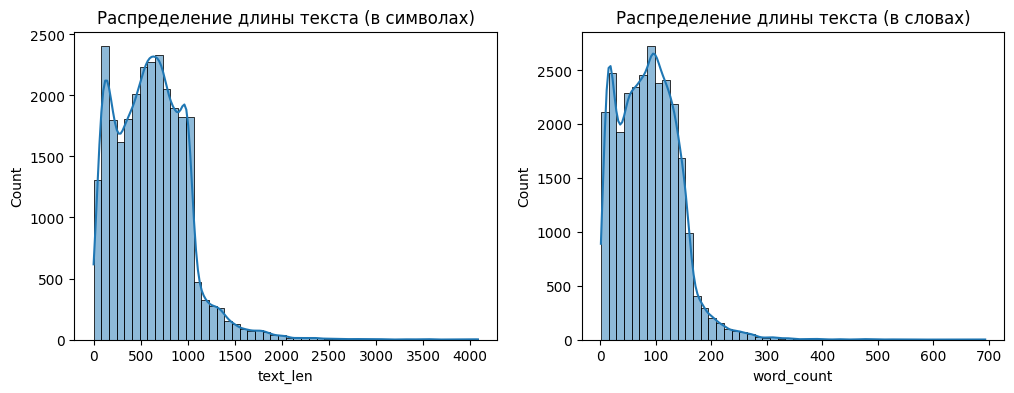

In [9]:
df["text_len"] = df["text"].apply(len)
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["text_len"], bins=50, kde=True)
plt.title("Распределение длины текста (в символах)")


plt.subplot(1,2,2)
sns.histplot(df["word_count"], bins=50, kde=True)
plt.title("Распределение длины текста (в словах)")
plt.show()

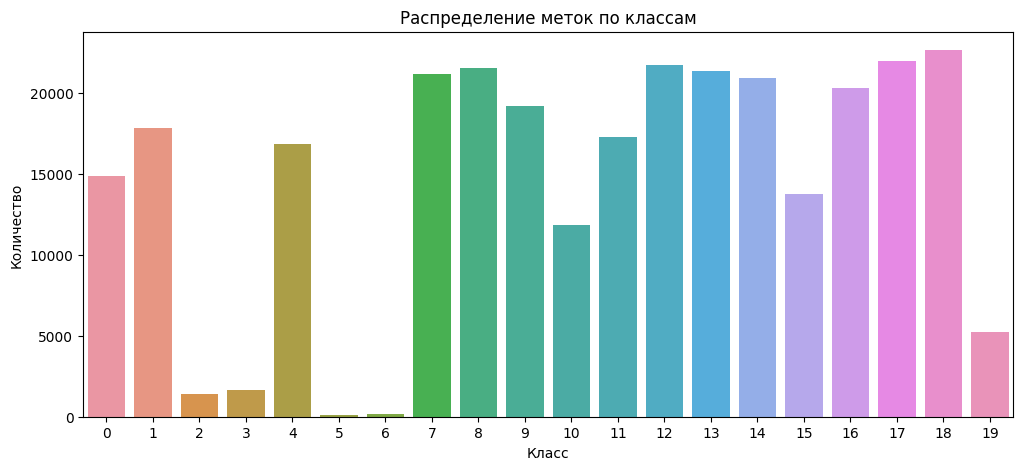

In [10]:
df["labels_split"] = df["labels"].apply(lambda x: list(map(int, x.split(" "))))

all_labels = np.array(df["labels_split"].tolist())
label_sums = np.sum(all_labels, axis=0)


plt.figure(figsize=(12,5))
sns.barplot(x=np.arange(len(label_sums)), y=label_sums)
plt.title("Распределение меток по классам")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

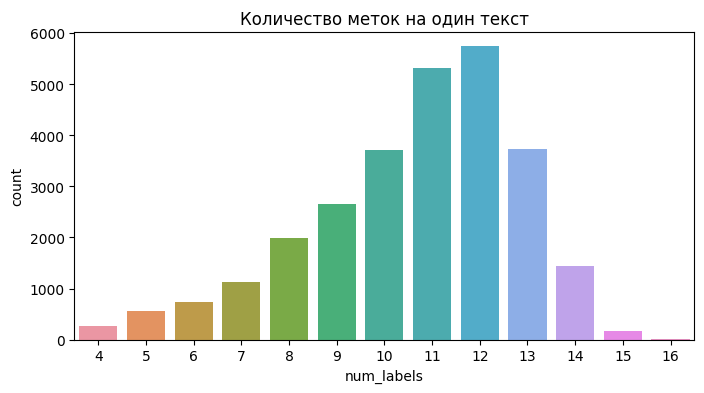

In [11]:
df["num_labels"] = df["labels_split"].apply(sum)
plt.figure(figsize=(8,4))
sns.countplot(x=df["num_labels"])
plt.title("Количество меток на один текст")
plt.show()

In [12]:
top_labels = np.argsort(label_sums)[-3:][::-1]
rare_labels = np.argsort(label_sums)[:3]

print("частые метки:", top_labels)
for label in top_labels:
    sample_text = df[df["labels_split"].apply(lambda x: x[label] == 1)]["text"].iloc[0]
    print(f"\nМетка {label} пример:\n", sample_text)

print("Редкие метки:", rare_labels)
for label in rare_labels:
    sample_text = df[df["labels_split"].apply(lambda x: x[label] == 1)]["text"].iloc[0]
    print(f"\nМетка {label} пример:\n", sample_text)

частые метки: [18 17 12]

Метка 18 пример:
 Впервые в Уфе танцевальная терапия в группе с практикующим психологом
Тема встречи: «Отношения. Доверие. Контакт»
Приходите, если:
🔸
вы хотите наладить или поисследовать свои отношения с
-  телом
- собой
- близким человеком
- работой
- деньгами
🔸
не можете разрешить или забыть какую-то  ситуацию, связанную с отношениями
🔸
не умеете доверять или делегировать
🔸
тяжело вступаете в контакт
Задать вопрос психологу курса
и записаться можно здесь:
@LeontevaKsenia
Дата
: 26 января
Время
: 19.00-21.00
Адрес
: Коммунистическая, 45/3, Б/ц "Деловой двор"
Стоимость: 1500
Что нужно для занятия:
удобная одежда, носки, вода, желание танцевать.

Метка 17 пример:
 Впервые в Уфе танцевальная терапия в группе с практикующим психологом
Тема встречи: «Отношения. Доверие. Контакт»
Приходите, если:
🔸
вы хотите наладить или поисследовать свои отношения с
-  телом
- собой
- близким человеком
- работой
- деньгами
🔸
не можете разрешить или забыть какую-то  ситуацию, свя

## Основные выводы

 **Длина текста**:

   -по символам: в среднем умеренная, есть как короткие, так и длинные тексты

   -по словам: разброс довольно большой, тексты от коротких анонсов до длинных описаний мероприятий
   
  **Классы:** 
   
   -распределение несбалансированное — есть классы, которые встречаются в 2–3 раза чаще, чем другие

   -Топ-3 самых частых класса: 18, 17, 12. Например, 18 и 17 встречаются часто в текстах, связанных с психологией и личностным ростом
      
   -3 самых редких класса: 5, 6, 2. Это культурные мероприятия и мастер-классы — встречаются редко   
   **Количество меток на один текст:**
    от 1 до 10+, чаще всего 4–6 .Тексты из топ-классов часто многометочные. Тексты с редкими метками — обычно узконаправленные


# RNN

In [185]:
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [186]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split


tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)  


X_train = tokenizer.texts_to_sequences(train_texts)
X_val = tokenizer.texts_to_sequences(val_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

vocab_size = len(tokenizer.word_index) + 1
max_len = np.max([len(x) for x in X_train]) 


X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')



y_train = np.array([list(map(int, sample)) for sample in y_train])
y_test = np.array([list(map(int, sample)) for sample in y_test])


num_labels = y_train.shape[1] 
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Число классов
])


class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred)
        self.recall.update_state(y_true, y_pred)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', F1Score()]
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=15,
    verbose=1
)


y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)


print("\nF1-score (micro):", f1_score(y_val, y_val_pred_binary, average='micro'))
print("F1-score (macro):", f1_score(y_val, y_val_pred_binary, average='macro'))


print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_binary))



2025-05-16 18:46:00.273028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 18:46:00.275080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 18:46:00.277038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2025-05-16 18:46:00.533571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 18:46:00.536043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 18:46:00.537438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

687/687 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.0030 - f1_score: 0.7955

2025-05-16 18:46:47.773693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 18:46:47.774933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 18:46:47.776618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

687/687 [==============================] - 48s 67ms/step - loss: 0.4968 - accuracy: 0.0030 - f1_score: 0.7955 - val_loss: 0.4903 - val_accuracy: 0.0000e+00 - val_f1_score: 0.7959
Epoch 2/15
687/687 [==============================] - 17s 24ms/step - loss: 0.4926 - accuracy: 0.0021 - f1_score: 0.7975 - val_loss: 0.4899 - val_accuracy: 0.0000e+00 - val_f1_score: 0.7959
Epoch 3/15
687/687 [==============================] - 12s 17ms/step - loss: 0.4925 - accuracy: 0.0015 - f1_score: 0.7975 - val_loss: 0.4904 - val_accuracy: 0.0000e+00 - val_f1_score: 0.8041
Epoch 4/15
687/687 [==============================] - 10s 15ms/step - loss: 0.4924 - accuracy: 9.1062e-04 - f1_score: 0.7982 - val_loss: 0.4895 - val_accuracy: 0.0000e+00 - val_f1_score: 0.7959
Epoch 5/15
687/687 [==============================] - 9s 13ms/step - loss: 0.4924 - accuracy: 0.0011 - f1_score: 0.7980 - val_loss: 0.4900 - val_accuracy: 0.0000e+00 - val_f1_score: 0.7959
Epoch 6/15
687/687 [==============================] - 9s 1

2025-05-16 18:48:53.771864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 18:48:53.773322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 18:48:53.774791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

172/172 [==============================] - 1s 3ms/step

F1-score (micro): 0.804174766610737
F1-score (macro): 0.5773836982707389

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2988
           1       0.65      1.00      0.79      3549
           2       0.00      0.00      0.00       283
           3       0.00      0.00      0.00       319
           4       0.61      1.00      0.76      3362
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        48
           7       0.78      1.00      0.88      4299
           8       0.78      1.00      0.88      4305
           9       0.71      1.00      0.83      3872
          10       0.00      0.00      0.00      2393
          11       0.63      1.00      0.77      3454
          12       0.79      1.00      0.88      4333
          13       0.78      1.00      0.88      4305
          14       0.77      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
from tensorflow.keras.layers import Bidirectional

In [197]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^а-яё]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [t for t in tokens if t not in russian_stopwords and len(t) > 1]
    return ' '.join(tokens) 

df = train_df
df['processed'] = df['text'].apply(preprocess)


X_train, X_val, y_train, y_val = train_test_split(
    df['processed'], 
    df['labels'], 
    test_size=0.2
)

# Токенизация
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

max_len = 100  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

y_train = np.array([list(map(int, s.split())) for s in y_train])
y_val = np.array([list(map(int, s.split())) for s in y_val])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(
        input_dim=20000,      
        output_dim=256,       
        input_length=max_len  
    ),
    
    LSTM(
        256,                
        return_sequences=False,
        dropout=0.2       
    ),
    
    Dense(64, activation='relu'),
    

    Dense(y_train.shape[1], activation='sigmoid')  
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    ModelCheckpoint('best_lstm_model.h5', 
                  monitor='val_loss',
                  save_best_only=True,
                  verbose=1)
]

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20, 
    batch_size=32,
    callbacks=callbacks,  
    verbose=1
)

# Оценка
y_val_pred = (model.predict(X_val_pad) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred))


2025-05-16 19:23:06.032708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 19:23:06.035602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 19:23:06.037110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2025-05-16 19:23:06.290997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 19:23:06.293047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 19:23:06.294976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

687/687 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.0131

2025-05-16 19:23:50.766247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 19:23:50.767857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 19:23:50.769478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_loss improved from inf to 0.31934, saving model to best_lstm_model.h5
687/687 [==============================] - 49s 69ms/step - loss: 0.3541 - accuracy: 0.0131 - val_loss: 0.3193 - val_accuracy: 0.0195
Epoch 2/20
687/687 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.0133
Epoch 2: val_loss improved from 0.31934 to 0.27491, saving model to best_lstm_model.h5
687/687 [==============================] - 20s 30ms/step - loss: 0.2870 - accuracy: 0.0133 - val_loss: 0.2749 - val_accuracy: 0.0193
Epoch 3/20
687/687 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.0138
Epoch 3: val_loss improved from 0.27491 to 0.25777, saving model to best_lstm_model.h5
687/687 [==============================] - 13s 18ms/step - loss: 0.2543 - accuracy: 0.0138 - val_loss: 0.2578 - val_accuracy: 0.0193
Epoch 4/20
687/687 [==============================] - ETA: 0s - loss: 0.2296 - accuracy: 0.0142
Epoch 4: val_loss improved from 0.25777 to 0.24303, sav

2025-05-16 19:25:13.016510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-16 19:25:13.018446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-16 19:25:13.020106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

172/172 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      2948
           1       0.90      0.88      0.89      3548
           2       0.66      0.08      0.14       276
           3       0.73      0.42      0.54       313
           4       0.85      0.85      0.85      3406
           5       0.50      0.05      0.09        21
           6       1.00      0.08      0.15        37
           7       0.91      0.91      0.91      4233
           8       0.92      0.95      0.94      4319
           9       0.94      0.94      0.94      3842
          10       0.91      0.90      0.91      2356
          11       0.92      0.92      0.92      3454
          12       0.91      0.96      0.93      4330
          13       0.94      0.97      0.96      4276
          14       0.90      0.97      0.93      4210
          15       0.90      0.91      0.90      2765
          16       0.94   

In [198]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for thresh in thresholds:
    preds = (y_val_pred > thresh).astype(int)
    f1 = f1_score(y_val, preds, average='macro')  # или 'macro', зависит от задачи
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Лучший порог: {best_thresh:.2f}, с F1: {best_f1:.4f}")

Лучший порог: 0.10, с F1: 0.7775


In [184]:
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.2).astype(int)

print("\nF1-score (micro):", f1_score(y_val, y_val_pred_binary, average='micro'))
print("F1-score (macro):", f1_score(y_val, y_val_pred_binary, average='macro'))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_binary))

172/172 [==============================] - 0s 983us/step

F1-score (micro): 0.8970172585305775
F1-score (macro): 0.8006234308197142

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      2988
           1       0.82      0.95      0.88      3549
           2       0.41      0.39      0.40       283
           3       0.55      0.76      0.64       319
           4       0.78      0.93      0.85      3362
           5       0.00      0.00      0.00        16
           6       0.92      0.50      0.65        48
           7       0.81      0.99      0.89      4299
           8       0.88      0.98      0.93      4305
           9       0.89      0.98      0.94      3872
          10       0.84      0.94      0.89      2393
          11       0.85      0.96      0.90      3454
          12       0.86      0.99      0.92      4333
          13       0.83      1.00      0.91      4305
          14       0.88      0.98

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попробуем другой препроцессинг

In [14]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, 
                                      ReduceLROnPlateau, LearningRateScheduler)
import re
from sklearn.metrics import f1_score, precision_score, recall_score  
from sklearn.metrics import classification_report

## Итоговый RNN

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df_0 = train_df
df_0['processed'] = df_0['text'].apply(preprocess_text)

X_temp, X_test, y_temp, y_test = train_test_split(
    df_0['processed'], df_0['labels'], test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25
)


tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(X_val),   maxlen=100, padding='post')
X_test_pad  = pad_sequences(tokenizer.texts_to_sequences(X_test),  maxlen=100, padding='post')

y_train = np.array([list(map(int, s.split())) for s in y_train])
y_val   = np.array([list(map(int, s.split())) for s in y_val])
y_test  = np.array([list(map(int, s.split())) for s in y_test])

In [18]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Val Loss')
    axes[0].set_title('Loss')
    axes[0].legend()
    axes[0].grid(True)

    if 'val_f1' in history.history:
        axes[1].plot(history.history['val_f1'], label='Val F1 Score', color='green')
        axes[1].set_title('Validation F1 Score')
        axes[1].legend()
        axes[1].grid(True)
    else:
        print("F1 score not found in history. Did you use MetricsCallback correctly?")

    plt.tight_layout()
    plt.show()

2025-05-19 01:10:23.320253: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20966 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:8c:00.0, compute capability: 8.9
2025-05-19 01:10:24.600272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-19 01:10:24.602253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/co

Epoch 1/30


2025-05-19 01:10:25.261429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-19 01:10:25.263717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-19 01:10:25.265415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

515/515 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.8026 - precision: 0.7714 - recall: 0.8933 - auc: 0.8861

2025-05-19 01:11:22.425229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-19 01:11:22.426831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-19 01:11:22.428669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

172/172 [==============================] - 1s 2ms/step

 Epoch 1: val_f1=0.8606, precision=0.8327, recall=0.8904
515/515 [==============================] - 63s 103ms/step - loss: 0.4090 - accuracy: 0.8026 - precision: 0.7714 - recall: 0.8933 - auc: 0.8861 - val_loss: 0.3284 - val_accuracy: 0.8460 - val_precision: 0.8327 - val_recall: 0.8904 - val_auc: 0.9299 - lr: 2.0000e-04 - val_f1: 0.8606
Epoch 2/30
172/172 [==============================] - 0s 2ms/steposs: 0.3187 - accuracy: 0.8507 - precision: 0.8297 - recall: 0.9049

 Epoch 2: val_f1=0.8679, precision=0.8349, recall=0.9036
515/515 [==============================] - 25s 48ms/step - loss: 0.3187 - accuracy: 0.8507 - precision: 0.8297 - recall: 0.9049 - auc: 0.9343 - val_loss: 0.3171 - val_accuracy: 0.8532 - val_precision: 0.8349 - val_recall: 0.9036 - val_auc: 0.9347 - lr: 8.0000e-05 - val_f1: 0.8679
Epoch 3/30
172/172 [==============================] - 0s 2ms/steposs: 0.3103 - accuracy: 0.8552 - precision: 0.8378 - recall: 0.9022


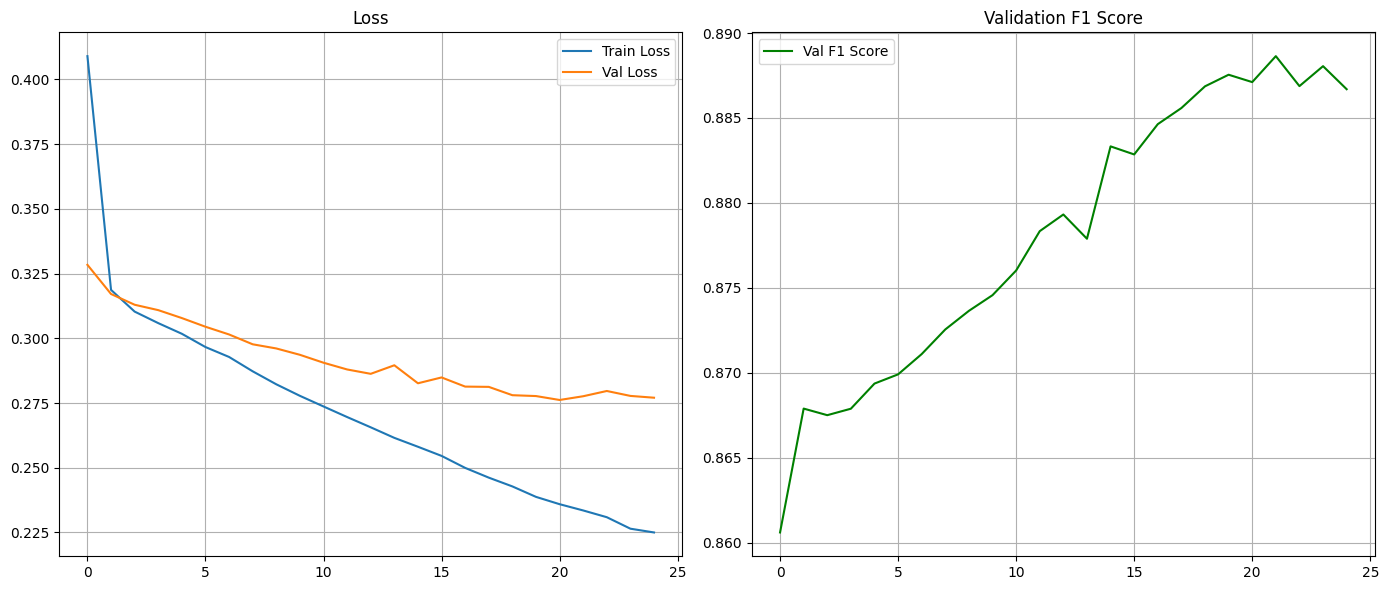


Оценка на тестовых данных:
Test Loss: 0.2790
Test Accuracy: 0.8768
172/172 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.66      0.62      2951
     Class 1       0.84      0.90      0.87      3503
     Class 2       0.00      0.00      0.00       290
     Class 3       0.69      0.39      0.50       320
     Class 4       0.75      0.86      0.80      3353
     Class 5       0.00      0.00      0.00        26
     Class 6       0.00      0.00      0.00        35
     Class 7       0.86      0.92      0.89      4205
     Class 8       0.83      0.95      0.89      4202
     Class 9       0.89      0.96      0.93      3826
    Class 10       0.91      0.89      0.90      2400
    Class 11       0.83      0.90      0.87      3464
    Class 12       0.87      0.97      0.92      4311
    Class 13       0.92      0.96      0.94      4274
    Class 14       0.84      0.94      0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, patience=3):
        super().__init__()
        self.X_val = val_data[0]
        self.y_val = val_data[1]
        self.patience = patience
        self.wait = 0
        self.best_f1 = 0
        self.best_weights = None
        
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(self.X_val) > 0.5).astype(int)
        f1 = f1_score(self.y_val, val_pred, average='micro')
        precision = precision_score(self.y_val, val_pred, average='micro')
        recall = recall_score(self.y_val, val_pred, average='micro')
        
        logs['val_f1'] = f1
        
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                print(f"\nРанняя остановка: F1 не улучшался {self.patience} эпохи")
        
        print(f"\n Epoch {epoch+1}: val_f1={f1:.4f}, precision={precision:.4f}, recall={recall:.4f}")

def warmup_schedule(epoch, lr):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return lr * (epoch + 1) / warmup_epochs
    return lr

model = Sequential([
    Embedding(
        input_dim=20000,      
        output_dim=256,       
        input_length=100 
    ),
    
    LSTM(256, return_sequences=False,dropout=0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  
])


model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    LearningRateScheduler(warmup_schedule),
    MetricsCallback(val_data=(X_val_pad, y_val))
]

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


plot_training_history(history)

print("\nОценка на тестовых данных:")
test_results = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in range(y_test.shape[1])]))

# CNN

In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import Callback
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'\\n', ' ', text)
    text = re.sub(r'\bn\b', '', text)
    text = re.sub(r'[^а-яё]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return [t for t in tokens if t not in russian_stopwords and len(t) > 1]

In [ ]:
df = train_df

In [97]:
df = train_df
df['processed'] = df['text'].apply(lambda x: ' '.join(preprocess(x)))

/tmp/ipykernel_4896/1291187215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['text'].apply(lambda x: ' '.join(preprocess(x)))


In [98]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    df['processed'], df['labels'], test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25
)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(X_val),   maxlen=100, padding='post')
X_test_pad  = pad_sequences(tokenizer.texts_to_sequences(X_test),  maxlen=100, padding='post')

y_train = np.array([list(map(int, s.split())) for s in y_train])
y_val   = np.array([list(map(int, s.split())) for s in y_val])
y_test  = np.array([list(map(int, s.split())) for s in y_test])

In [99]:
val_f1_history = []

class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(X_val_pad) > 0.5).astype(int)
        f1 = f1_score(y_val, val_pred, average='micro')
        precision = precision_score(y_val, val_pred, average='micro')
        recall = recall_score(y_val, val_pred, average='micro')
        val_f1_history.append(f1)
        
        print(f"\n📊 Epoch {epoch+1}: val_f1 = {f1:.4f}, val_precision = {precision:.4f}, val_recall = {recall:.4f}")

In [100]:
max_len = 100
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [102]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop, model_ckpt, MetricsCallback()]
)

Epoch 1/15
172/172 [==============================] - 0s 868us/steps: 0.3403 - accuracy: 

📊 Epoch 1: val_f1 = 0.8938, val_precision = 0.8735, val_recall = 0.9149
515/515 [==============================] - 38s 72ms/step - loss: 0.3402 - accuracy: 0.0032 - val_loss: 0.2614 - val_accuracy: 0.0013
Epoch 2/15
172/172 [==============================] - 0s 854us/steps: 0.2218 - accuracy: 

📊 Epoch 2: val_f1 = 0.9095, val_precision = 0.8912, val_recall = 0.9286
515/515 [==============================] - 11s 21ms/step - loss: 0.2218 - accuracy: 0.0020 - val_loss: 0.2271 - val_accuracy: 0.0035
Epoch 3/15
172/172 [==============================] - 0s 858us/steps: 0.1647 - accuracy: 

📊 Epoch 3: val_f1 = 0.9126, val_precision = 0.9117, val_recall = 0.9134
515/515 [==============================] - 9s 17ms/step - loss: 0.1647 - accuracy: 0.0071 - val_loss: 0.2212 - val_accuracy: 0.0129
Epoch 4/15
172/172 [==============================] - 0s 869us/steps: 0.1206 - accuracy: 

📊 Epoch 4: val_f1 = 0.

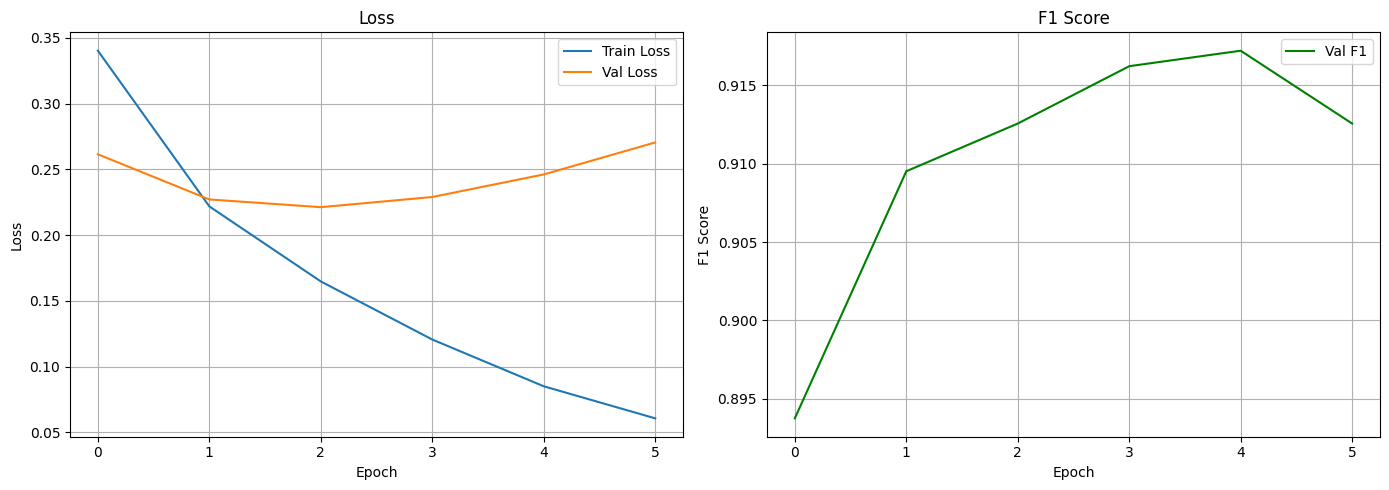

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(val_f1_history, label='Val F1', color='green')
axes[1].set_title('F1 Score')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('F1 Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [104]:
model.save('best_model.keras')

In [105]:
model = load_model('best_model.keras')

In [109]:
val_pred_proba = model.predict(X_val_pad)
val_pred = (val_pred_proba > 0.25).astype(int)

172/172 [==============================] - 0s 860us/step


In [110]:
print("Classification report на валидации (лучшей моделью):")
print(classification_report(y_val, val_pred, zero_division=0))

📋 Classification report на валидации (лучшей моделью):
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      3031
           1       0.82      0.96      0.89      3526
           2       0.67      0.09      0.16       300
           3       0.62      0.69      0.65       345
           4       0.80      0.93      0.86      3386
           5       0.12      0.38      0.18        16
           6       0.64      0.17      0.27        41
           7       0.84      0.98      0.90      4215
           8       0.91      0.97      0.94      4311
           9       0.87      0.99      0.93      3823
          10       0.78      0.97      0.86      2348
          11       0.88      0.95      0.91      3443
          12       0.89      0.98      0.93      4319
          13       0.89      0.98      0.93      4306
          14       0.87      0.98      0.92      4149
          15       0.87      0.91      0.89      2784
          16       0.91   

In [108]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for thresh in thresholds:
    preds = (val_pred_proba > thresh).astype(int)
    f1 = f1_score(y_val, preds, average='macro')  # или 'macro', зависит от задачи
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Лучший порог: {best_thresh:.2f}, с F1: {best_f1:.4f}")


Лучший порог: 0.25, с F1: 0.7893


In [64]:
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post')

test_pred_proba = model.predict(X_test)
test_pred = (test_pred_proba > 0.21).astype(int)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in test_pred]
})

submission.to_csv('submission_best_model.csv', index=False)
print(submission.head())

231/231 [==============================] - 0s 892us/step
      id                                   labels
0  29568  1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
1  29569  1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
2  29570  0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
3  29571  1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0
4  29572  1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1


In [34]:
from sklearn.metrics import classification_report

val_pred_proba = model.predict(X_val_pad)
val_pred = (val_pred_proba > 0.5).astype(int)

print("Classification report на валидации:")
print(classification_report(y_val, val_pred, zero_division=0))

172/172 [==============================] - 0s 859us/step
📋 Classification report на валидации:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2899
           1       0.88      0.89      0.89      3592
           2       0.69      0.03      0.06       270
           3       0.72      0.47      0.57       321
           4       0.79      0.93      0.85      3324
           5       0.00      0.00      0.00        17
           6       1.00      0.03      0.05        36
           7       0.90      0.93      0.91      4238
           8       0.93      0.95      0.94      4277
           9       0.90      0.97      0.93      3825
          10       0.88      0.88      0.88      2435
          11       0.93      0.91      0.92      3497
          12       0.90      0.96      0.93      4343
          13       0.89      0.98      0.93      4259
          14       0.90      0.95      0.93      4208
          15       0.87      0.88      0

In [111]:
def lr_schedule(epoch):
    if epoch < 3:
        return 1e-4 + (1e-3 - 1e-4) * (epoch / 3)
    else:
        return 1e-3 * tf.math.exp(0.1 * (3 - epoch)).numpy()

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss')

In [112]:
val_f1_history = []

class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(X_val_pad) > 0.5).astype(int)
        f1 = f1_score(y_val, val_pred, average='micro', zero_division=0)
        precision = precision_score(y_val, val_pred, average='micro', zero_division=0)
        recall = recall_score(y_val, val_pred, average='micro', zero_division=0)
        val_f1_history.append(f1)
        print(f"\n📊 Epoch {epoch+1}: val_f1 = {f1:.4f}, val_precision = {precision:.4f}, val_recall = {recall:.4f}")

In [113]:

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [114]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[MetricsCallback(), early_stop, checkpoint, lr_scheduler]
)

Epoch 1/15
172/172 [==============================] - 0s 878us/steps: 0.5083 - accuracy: 

📊 Epoch 1: val_f1 = 0.8396, val_precision = 0.7805, val_recall = 0.9084
515/515 [==============================] - 38s 71ms/step - loss: 0.5083 - accuracy: 0.0083 - val_loss: 0.3949 - val_accuracy: 0.0166 - lr: 1.0000e-04
Epoch 2/15
172/172 [==============================] - 0s 868us/steps: 0.3256 - accuracy: 

📊 Epoch 2: val_f1 = 0.8801, val_precision = 0.8666, val_recall = 0.8940
515/515 [==============================] - 12s 23ms/step - loss: 0.3256 - accuracy: 0.0112 - val_loss: 0.2867 - val_accuracy: 0.0024 - lr: 4.0000e-04
Epoch 3/15
172/172 [==============================] - 0s 867us/steps: 0.2494 - accuracy: 

📊 Epoch 3: val_f1 = 0.9012, val_precision = 0.8788, val_recall = 0.9249
515/515 [==============================] - 7s 14ms/step - loss: 0.2488 - accuracy: 0.0013 - val_loss: 0.2454 - val_accuracy: 0.0024 - lr: 7.0000e-04
Epoch 4/15
172/172 [==============================] - 0s 831us

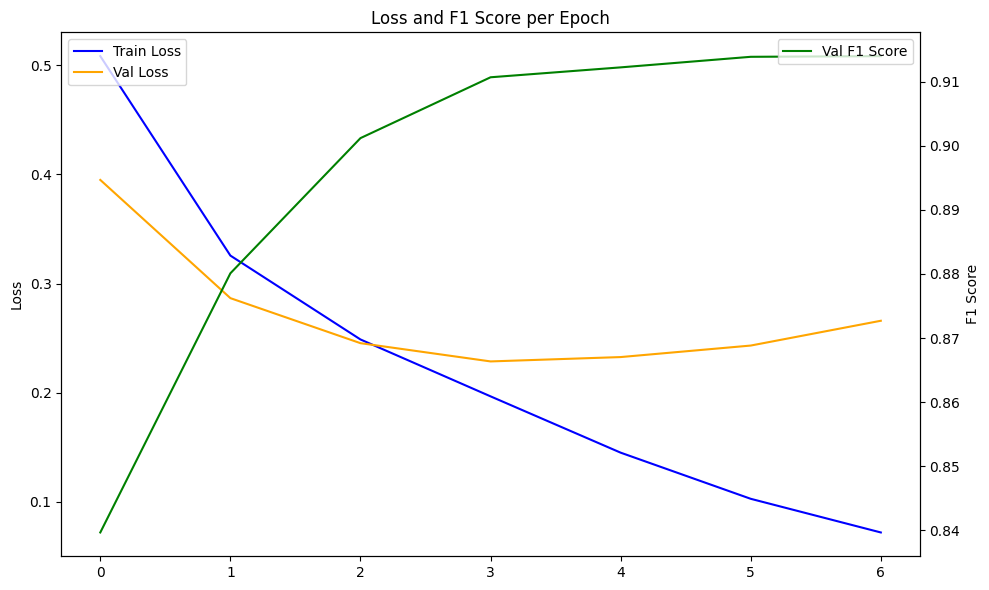

In [115]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(history.history['loss'], label='Train Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Val Loss', color='orange')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(val_f1_history, label='Val F1 Score', color='green')
ax2.set_ylabel('F1 Score')
ax2.legend(loc='upper right')

plt.title('Loss and F1 Score per Epoch')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()


In [116]:
model = load_model('best_cnn_model.h5')

In [120]:
from sklearn.metrics import classification_report

val_pred_proba = model.predict(X_val_pad)
val_pred = (val_pred_proba > 0.3).astype(int)

print("Classification report на валидации:")
print(classification_report(y_val, val_pred, zero_division=0))

172/172 [==============================] - 0s 939us/step
📋 Classification report на валидации:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      3031
           1       0.81      0.96      0.88      3526
           2       0.74      0.09      0.17       300
           3       0.56      0.76      0.65       345
           4       0.75      0.97      0.84      3386
           5       0.00      0.00      0.00        16
           6       1.00      0.10      0.18        41
           7       0.85      0.97      0.90      4215
           8       0.90      0.98      0.93      4311
           9       0.86      0.99      0.92      3823
          10       0.78      0.95      0.86      2348
          11       0.87      0.95      0.91      3443
          12       0.88      0.99      0.93      4319
          13       0.87      0.99      0.92      4306
          14       0.88      0.98      0.93      4149
          15       0.83      0.93      0

In [121]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for thresh in thresholds:
    preds = (val_pred_proba > thresh).astype(int)
    f1 = f1_score(y_val, preds, average='macro')  # или 'macro', зависит от задачи
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Лучший порог: {best_thresh:.2f}, с F1: {best_f1:.4f}")

Лучший порог: 0.30, с F1: 0.7717


In [122]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization


In [123]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(256, 5, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')
])

In [124]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    
)

In [130]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, restore_best_weights=True
)

In [131]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[MetricsCallback(), early_stop, early_stopping, scheduler]
)

Epoch 1/15
172/172 [==============================] - 0s 968us/steps: 0.1821 - accuracy

📊 Epoch 1: val_f1 = 0.9075, val_precision = 0.8958, val_recall = 0.9194
515/515 [==============================] - 3s 6ms/step - loss: 0.1821 - accuracy: 0.0130 - val_loss: 0.2409 - val_accuracy: 0.0148 - lr: 4.9659e-04
Epoch 2/15
172/172 [==============================] - 0s 971us/steps: 0.1728 - accuracy

📊 Epoch 2: val_f1 = 0.9109, val_precision = 0.8986, val_recall = 0.9236
515/515 [==============================] - 3s 7ms/step - loss: 0.1728 - accuracy: 0.0125 - val_loss: 0.2351 - val_accuracy: 0.0146 - lr: 4.9659e-04
Epoch 3/15
172/172 [==============================] - 0s 977us/steps: 0.1648 - accuracy

📊 Epoch 3: val_f1 = 0.9079, val_precision = 0.9049, val_recall = 0.9110
515/515 [==============================] - 3s 6ms/step - loss: 0.1648 - accuracy: 0.0113 - val_loss: 0.2470 - val_accuracy: 0.0142 - lr: 4.9659e-04
Epoch 4/15
172/172 [==============================] - 0s 969us/steps: 0.1

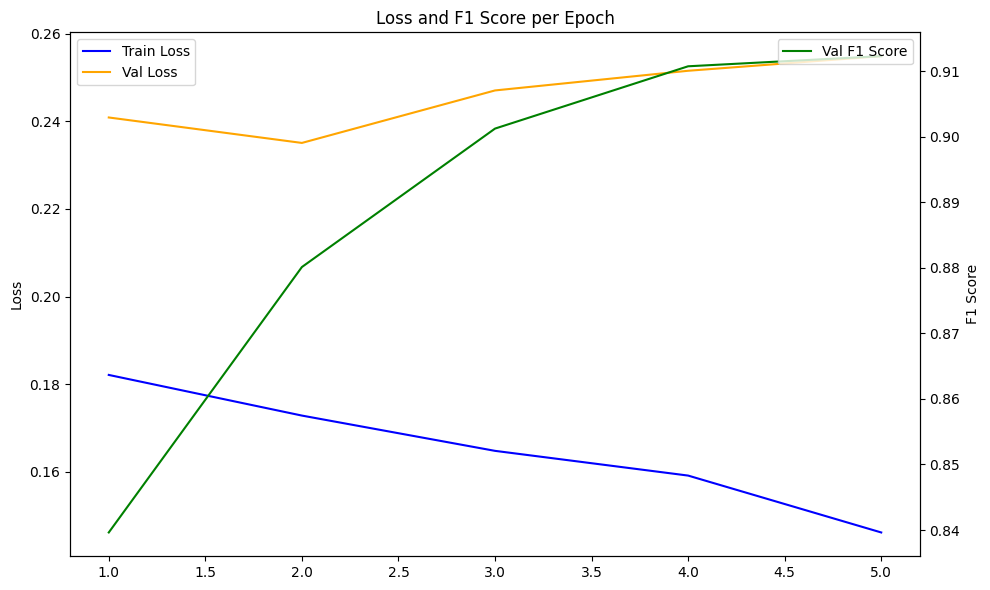

In [132]:
epochs_num = min(len(val_f1_history), len(history.history['loss']))
epochs = range(1, epochs_num + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(epochs, history.history['loss'][:epochs_num], label='Train Loss', color='blue')
ax1.plot(epochs, history.history['val_loss'][:epochs_num], label='Val Loss', color='orange')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(epochs, val_f1_history[:epochs_num], label='Val F1 Score', color='green')
ax2.set_ylabel('F1 Score')
ax2.legend(loc='upper right')

plt.title('Loss and F1 Score per Epoch')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [133]:
model = load_model('best_cnn_model.h5')

In [134]:
from sklearn.metrics import classification_report

val_pred_proba = model.predict(X_val_pad)
val_pred = (val_pred_proba > 0.3).astype(int)

print("Classification report на валидации:")
print(classification_report(y_val, val_pred, zero_division=0))

172/172 [==============================] - 0s 843us/step
📋 Classification report на валидации:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      3031
           1       0.81      0.96      0.88      3526
           2       0.74      0.09      0.17       300
           3       0.56      0.76      0.65       345
           4       0.75      0.97      0.84      3386
           5       0.00      0.00      0.00        16
           6       1.00      0.10      0.18        41
           7       0.85      0.97      0.90      4215
           8       0.90      0.98      0.93      4311
           9       0.86      0.99      0.92      3823
          10       0.78      0.95      0.86      2348
          11       0.87      0.95      0.91      3443
          12       0.88      0.99      0.93      4319
          13       0.87      0.99      0.92      4306
          14       0.88      0.98      0.93      4149
          15       0.83      0.93      0

In [135]:
from sklearn.metrics import f1_score
model = load_model('best_cnn_model.h5')
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for thresh in thresholds:
    preds = (val_pred_proba > thresh).astype(int)
    f1 = f1_score(y_val, preds, average='macro')  # или 'macro', зависит от задачи
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Лучший порог: {best_thresh:.2f}, с F1: {best_f1:.4f}")

Лучший порог: 0.30, с F1: 0.7717


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [6]:
import re
from pymorphy2 import MorphAnalyzer
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


2025-05-18 14:37:35.822783: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 14:37:35.875545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 14:37:36.805155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
nltk.download('stopwords')
morph = MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^\w\sа-яА-ЯёЁ-]|[\U0001F600-\U0001F64F]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    words = text.split()
    words = [morph.parse(word)[0].normal_form for word in words if word not in russian_stopwords]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from sklearn.model_selection import train_test_split

df = train_df
df['processed'] = df['text'].apply(lambda x: ' '.join(clean_text(x)))

X_temp, X_test, y_temp, y_test = train_test_split(
    df['processed'], df['labels'], test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25
)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(X_val),   maxlen=100, padding='post')
X_test_pad  = pad_sequences(tokenizer.texts_to_sequences(X_test),  maxlen=100, padding='post')

y_train = np.array([list(map(int, s.split())) for s in y_train])
y_val   = np.array([list(map(int, s.split())) for s in y_val])
y_test  = np.array([list(map(int, s.split())) for s in y_test])

Epoch 1/15


2025-05-18 14:46:09.474523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2025-05-18 14:46:13.442714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-05-18 14:46:14.906988: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ff1180f1950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 14:46:14.907030: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-05-18 14:46:15.711339: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 14:46:19.737073: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


172/172 [==============================] - 0s 988us/steps: 0.3900 - accuracy:
Epoch 1: val_f1 = 0.8541, val_precision = 0.8150, val_recall = 0.8972
515/515 [==============================] - 21s 11ms/step - loss: 0.3900 - accuracy: 0.0112 - val_loss: 0.3461 - val_accuracy: 0.0151
Epoch 2/15
172/172 [==============================] - 0s 992us/steps: 0.3352 - accuracy
Epoch 2: val_f1 = 0.8534, val_precision = 0.8359, val_recall = 0.8717
515/515 [==============================] - 3s 5ms/step - loss: 0.3351 - accuracy: 0.0161 - val_loss: 0.3324 - val_accuracy: 0.0168
Epoch 3/15
172/172 [==============================] - 0s 951us/steps: 0.3182 - accuracy
Epoch 3: val_f1 = 0.8613, val_precision = 0.8252, val_recall = 0.9008
515/515 [==============================] - 3s 5ms/step - loss: 0.3182 - accuracy: 0.0177 - val_loss: 0.3251 - val_accuracy: 0.0162
Epoch 4/15
172/172 [==============================] - 0s 987us/steps: 0.3073 - accuracy
Epoch 4: val_f1 = 0.8632, val_precision = 0.8381, val

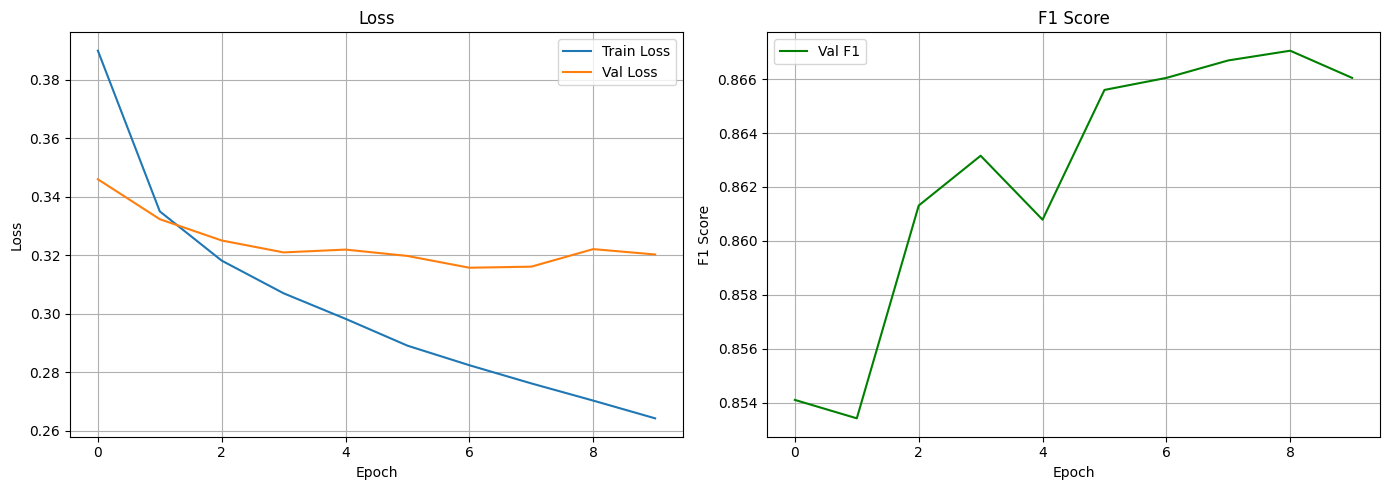

In [21]:
val_f1_history = []

class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(X_val_pad) > 0.5).astype(int)
        f1 = f1_score(y_val, val_pred, average='micro')
        precision = precision_score(y_val, val_pred, average='micro')
        recall = recall_score(y_val, val_pred, average='micro')
        val_f1_history.append(f1)
        
        print(f"Epoch {epoch+1}: val_f1 = {f1:.4f}, val_precision = {precision:.4f}, val_recall = {recall:.4f}")
max_len = 100
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop, model_ckpt, MetricsCallback()]
)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(val_f1_history, label='Val F1', color='green')
axes[1].set_title('F1 Score')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('F1 Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, 
                                      ReduceLROnPlateau, LearningRateScheduler)
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Val Loss')
    axes[0].set_title('Loss')
    axes[0].legend()
    axes[0].grid(True)

    #  F1 Score
    if 'val_f1' in history.history:
        axes[1].plot(history.history['val_f1'], label='Val F1 Score', color='green')
        axes[1].set_title('Validation F1 Score')
        axes[1].legend()
        axes[1].grid(True)
    else:
        print("F1 score not found in history. Did you use MetricsCallback correctly?")

    plt.tight_layout()
    plt.show()

Epoch 1/30
172/172 [==============================] - 0s 954us/steps: 0.5160 - accuracy: 0.7427 - precision: 0.7314 - recall: 0.8151 - auc

 Epoch 1: val_f1=0.8523, precision=0.7890, recall=0.9265
515/515 [==============================] - 44s 84ms/step - loss: 0.5160 - accuracy: 0.7427 - precision: 0.7314 - recall: 0.8151 - auc: 0.8136 - val_loss: 0.3760 - val_accuracy: 0.8290 - val_precision: 0.7890 - val_recall: 0.9265 - val_auc: 0.9128 - lr: 2.0000e-04 - val_f1: 0.8523
Epoch 2/30
172/172 [==============================] - 0s 979us/steps: 0.3939 - accuracy: 0.8176 - precision: 0.8018 - recall: 0.8724 - auc

 Epoch 2: val_f1=0.8572, precision=0.8058, recall=0.9156
515/515 [==============================] - 16s 30ms/step - loss: 0.3939 - accuracy: 0.8176 - precision: 0.8018 - recall: 0.8724 - auc: 0.8982 - val_loss: 0.3487 - val_accuracy: 0.8376 - val_precision: 0.8058 - val_recall: 0.9156 - val_auc: 0.9246 - lr: 8.0000e-05 - val_f1: 0.8572
Epoch 3/30
172/172 [========================

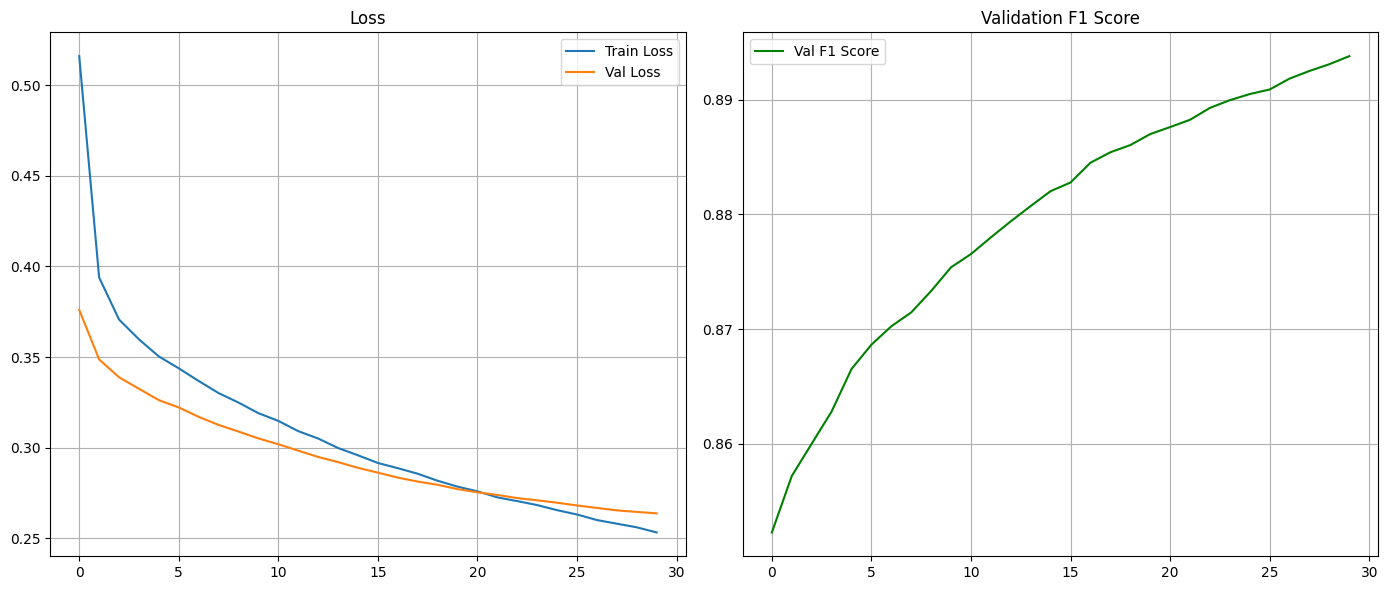


Оценка на тестовых данных:


ValueError: Data cardinality is ambiguous:
  x sizes: 7392
  y sizes: 5491
Make sure all arrays contain the same number of samples.

In [56]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, patience=3):
        super().__init__()
        self.X_val = val_data[0]
        self.y_val = val_data[1]
        self.patience = patience
        self.wait = 0
        self.best_f1 = 0
        self.best_weights = None
        
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(self.X_val) > 0.5).astype(int)
        f1 = f1_score(self.y_val, val_pred, average='micro')
        precision = precision_score(self.y_val, val_pred, average='micro')
        recall = recall_score(self.y_val, val_pred, average='micro')
        
        logs['val_f1'] = f1
        
        # Логика ранней остановки по F1
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                print(f"\nРанняя остановка: F1 не улучшался {self.patience} эпохи")
        
        print(f"\n Epoch {epoch+1}: val_f1={f1:.4f}, precision={precision:.4f}, recall={recall:.4f}")

# 3. Learning Rate Warmup
def warmup_schedule(epoch, lr):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return lr * (epoch + 1) / warmup_epochs
    return lr

# 4. Построение модели
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')
])

# 5. Компиляция с пользовательскими метриками
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# 6. Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    LearningRateScheduler(warmup_schedule),
    MetricsCallback(val_data=(X_val_pad, y_val))
]

# 7. Обучение
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


plot_training_history(history)

# 9. Оценка на тестовых данных
print("\nОценка на тестовых данных:")
test_results = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# 10. Дополнительные метрики
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in range(y_test.shape[1])]))

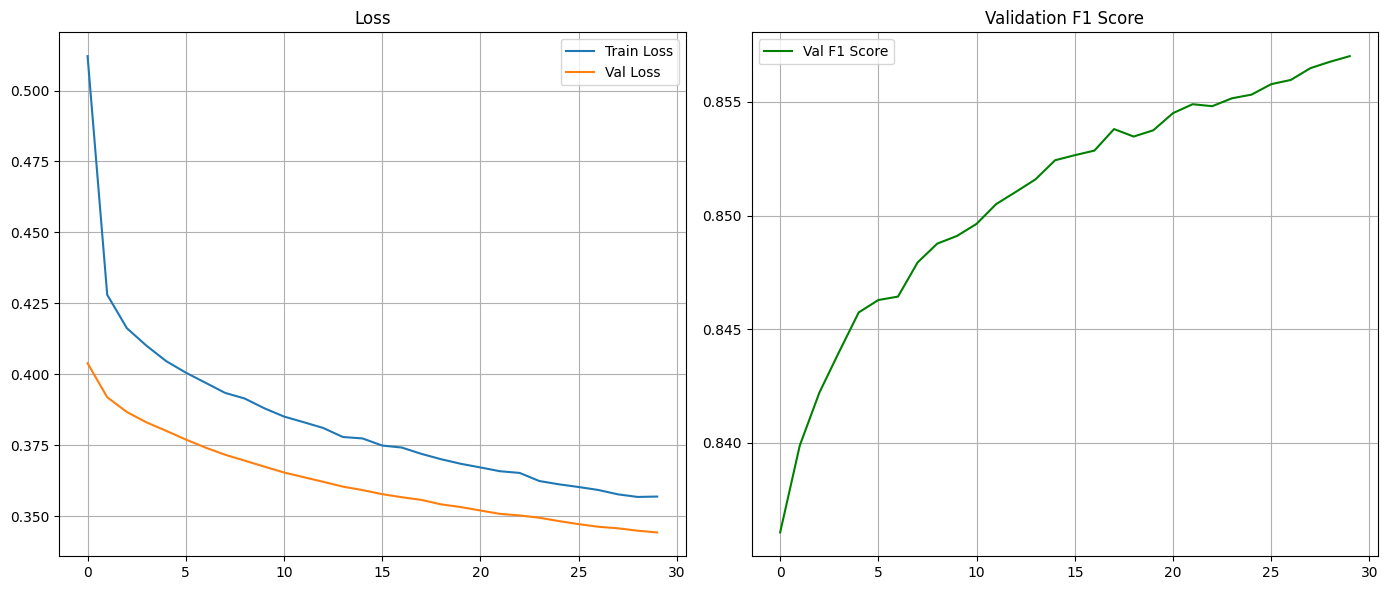

In [25]:
plot_training_history(history)

In [29]:
test_df['processed'] = test_df['text'].apply(lambda x: ' '.join(clean_text(x)))
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['processed']), 
                          maxlen=max_len, 
                          padding='post')

predictions = (model.predict(X_test_pad) > 0.5).astype(int)

def array_to_string(arr):
    return ' '.join(map(str, arr))

test_df['labels'] = [array_to_string(pred) for pred in predictions]
kaggle_submission = test_df[['id', 'labels']].copy()

kaggle_submission.to_csv('kaggle_submission.csv', index=False)

print(kaggle_submission.head())

231/231 [==============================] - 0s 1ms/step
      id                                   labels
0  29568  1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
1  29569  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
2  29570  1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
3  29571  1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
4  29572  1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0


In [20]:
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, 
                                      ReduceLROnPlateau, LearningRateScheduler)
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
from sklearn.metrics import classification_report

In [30]:
def refined_clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+|\S+@\S+', '', text)
    text = re.sub(r'[^\w\sа-яА-ЯёЁ!?,.-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    words = [word for word in text.split() if len(word) > 1 and not word.isdigit()]
    
    cleaned_words = []
    for word in words:
        try:
            parsed = morph.parse(word)[0]
            if parsed.tag.POS not in ('PREP', 'CONJ', 'PRCL'):  
                cleaned_words.append(parsed.normal_form)
        except:
            cleaned_words.append(word)  
    
    cleaned_words = [word for word in cleaned_words if word not in russian_stopwords]
    
    return ' '.join(cleaned_words)

### итог для CNN


In [39]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'\\n', ' ', text)
    text = re.sub(r'\bn\b', '', text)
    text = re.sub(r'[^а-яё]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return [t for t in tokens if t not in russian_stopwords and len(t) > 1]


In [43]:
from sklearn.model_selection import train_test_split

df = train_df
df['processed'] = df['text'].apply(lambda x: ' '.join(preprocess(x)))

X_temp, X_test, y_temp, y_test = train_test_split(
    df['processed'], df['labels'], test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25
)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(X_val),   maxlen=100, padding='post')
X_test_pad  = pad_sequences(tokenizer.texts_to_sequences(X_test),  maxlen=100, padding='post')

y_train = np.array([list(map(int, s.split())) for s in y_train])
y_val   = np.array([list(map(int, s.split())) for s in y_val])
y_test  = np.array([list(map(int, s.split())) for s in y_test])

Epoch 1/30
172/172 [==============================] - 0s 983us/steps: 0.5033 - accuracy: 0.7489 - precision: 0.7392 - recall: 0.8148 - auc:

 Epoch 1: val_f1=0.8525, precision=0.7966, recall=0.9167
515/515 [==============================] - 58s 109ms/step - loss: 0.5016 - accuracy: 0.7500 - precision: 0.7401 - recall: 0.8159 - auc: 0.8246 - val_loss: 0.3701 - val_accuracy: 0.8311 - val_precision: 0.7966 - val_recall: 0.9167 - val_auc: 0.9151 - lr: 2.0000e-04 - val_f1: 0.8525
Epoch 2/30
172/172 [==============================] - 0s 967us/steps: 0.3877 - accuracy: 0.8197 - precision: 0.8062 - recall: 0.8698 - auc

 Epoch 2: val_f1=0.8578, precision=0.8084, recall=0.9135
515/515 [==============================] - 21s 41ms/step - loss: 0.3877 - accuracy: 0.8197 - precision: 0.8062 - recall: 0.8698 - auc: 0.9017 - val_loss: 0.3486 - val_accuracy: 0.8387 - val_precision: 0.8084 - val_recall: 0.9135 - val_auc: 0.9235 - lr: 8.0000e-05 - val_f1: 0.8578
Epoch 3/30
172/172 [======================

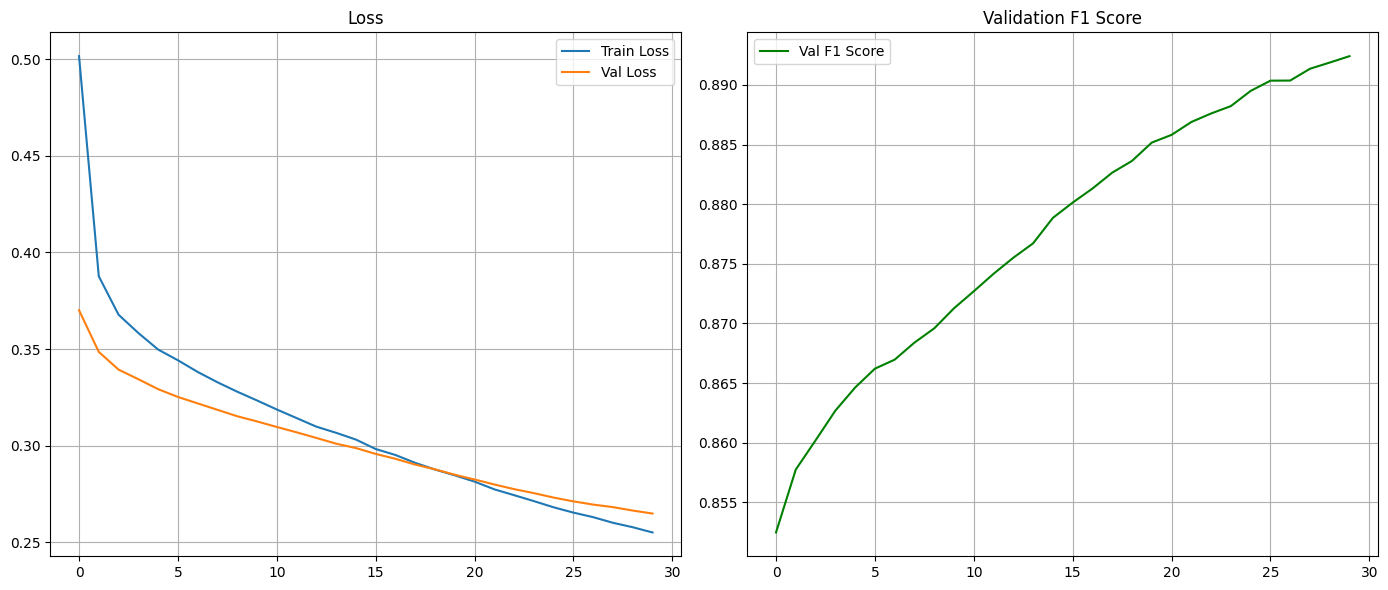


Оценка на тестовых данных:
Test Loss: 0.2653
Test Accuracy: 0.8814
172/172 [==============================] - 0s 961us/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.84      0.75      2972
     Class 1       0.83      0.91      0.87      3526
     Class 2       0.00      0.00      0.00       259
     Class 3       0.00      0.00      0.00       303
     Class 4       0.76      0.89      0.82      3345
     Class 5       0.00      0.00      0.00        15
     Class 6       0.00      0.00      0.00        35
     Class 7       0.86      0.94      0.90      4215
     Class 8       0.88      0.96      0.92      4286
     Class 9       0.90      0.94      0.92      3855
    Class 10       0.86      0.87      0.86      2345
    Class 11       0.86      0.91      0.88      3426
    Class 12       0.86      0.97      0.92      4323
    Class 13       0.88      0.97      0.92      4276
    Class 14       0.86      0.92      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, patience=3):
        super().__init__()
        self.X_val = val_data[0]
        self.y_val = val_data[1]
        self.patience = patience
        self.wait = 0
        self.best_f1 = 0
        self.best_weights = None
        
    def on_epoch_end(self, epoch, logs=None):
        val_pred = (self.model.predict(self.X_val) > 0.5).astype(int)
        f1 = f1_score(self.y_val, val_pred, average='micro')
        precision = precision_score(self.y_val, val_pred, average='micro')
        recall = recall_score(self.y_val, val_pred, average='micro')
        
        logs['val_f1'] = f1
        
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                print(f"\nРанняя остановка: F1 не улучшался {self.patience} эпохи")
        
        print(f"\n Epoch {epoch+1}: val_f1={f1:.4f}, precision={precision:.4f}, recall={recall:.4f}")

def warmup_schedule(epoch, lr):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return lr * (epoch + 1) / warmup_epochs
    return lr

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')
])

# 5. Компиляция с пользовательскими метриками
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    LearningRateScheduler(warmup_schedule),
    MetricsCallback(val_data=(X_val_pad, y_val))
]

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


plot_training_history(history)

print("\nОценка на тестовых данных:")
test_results = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in range(y_test.shape[1])]))

In [54]:
model = load_model('best_model.keras')
val_pred_proba = model.predict(X_val_pad)
val_pred = (val_pred_proba > 0.3).astype(int)

print("Classification report на валидации:")
print(classification_report(y_val, val_pred, zero_division=0))

172/172 [==============================] - 0s 978us/step
Classification report на валидации:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      2947
           1       0.78      0.97      0.87      3577
           2       0.00      0.00      0.00       274
           3       0.51      0.56      0.54       308
           4       0.68      0.99      0.80      3342
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        44
           7       0.83      0.98      0.90      4263
           8       0.82      0.99      0.90      4350
           9       0.87      0.98      0.92      3891
          10       0.78      0.93      0.85      2362
          11       0.80      0.97      0.88      3499
          12       0.84      1.00      0.91      4364
          13       0.82      1.00      0.90      4237
          14       0.82      0.98      0.90      4196
          15       0.80      0.92      0.8

In [55]:
test_df['processed'] = test_df['text'].apply(lambda x: ' '.join(preprocess(x)))
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['processed']), 
                          maxlen=max_len, 
                          padding='post')

predictions = (model.predict(X_test_pad) > 0.3).astype(int)

def array_to_string(arr):
    return ' '.join(map(str, arr))

test_df['labels'] = [array_to_string(pred) for pred in predictions]
kaggle_submission = test_df[['id', 'labels']].copy()

kaggle_submission.to_csv('kaggle_submission_2.csv', index=False)

print(kaggle_submission.head())

231/231 [==============================] - 0s 993us/step
      id                                   labels
0  29568  1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
1  29569  1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
2  29570  1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
3  29571  1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
4  29572  1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0


In [53]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for thresh in thresholds:
    preds = (val_pred_proba > thresh).astype(int)
    f1 = f1_score(y_val, preds, average='macro') 
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Лучший порог: {best_thresh:.2f}, с F1: {best_f1:.4f}")

Лучший порог: 0.30, с F1: 0.7342


## BERT

In [233]:
import torch
torch.cuda.empty_cache()

In [13]:
# %pip uninstall -y transformers torch
# %pip install torch==2.0.1 transformers==4.29.2 --no-cache-dir --force-reinstall

In [3]:
import torch
from transformers import AutoModel, AutoTokenizer, get_cosine_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt


In [14]:
import torch.nn as nn
import torch.optim as optim

In [23]:
from copy import deepcopy

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.best_model = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_score is None:
            self.best_score = val_loss
            self.best_model = deepcopy(model)
        elif val_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.best_model = deepcopy(model)
            self.counter = 0

In [24]:
import matplotlib.pyplot as plt

def plot_metrics(train_losses, val_losses, val_f1_scores):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Losses")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(val_f1_scores, label='Val F1 Macro', color='green')
    plt.title("Validation F1 Macro")
    plt.legend()
    
    plt.show()

In [119]:
def save_model(model, path="best_model.pt"):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, path)

/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing B

Best threshold: 0.10, F1: 0.6341


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.97it/s]


Saved new best model with F1: 0.7264
Epoch 1: Train Loss: 0.3781 | Val Loss: 0.2797 | Val F1: 0.7264


Validation: 100%|██████████| 344/344 [00:05<00:00, 67.19it/s]


Saved new best model with F1: 0.7475
Epoch 2: Train Loss: 0.2647 | Val Loss: 0.2437 | Val F1: 0.7475


Validation: 100%|██████████| 344/344 [00:05<00:00, 67.43it/s]


Saved new best model with F1: 0.7702
Epoch 3: Train Loss: 0.2339 | Val Loss: 0.2238 | Val F1: 0.7702


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.60it/s]


Saved new best model with F1: 0.7764
Epoch 4: Train Loss: 0.2127 | Val Loss: 0.2118 | Val F1: 0.7764


Validation: 100%|██████████| 344/344 [00:05<00:00, 65.94it/s]


Saved new best model with F1: 0.7826
Epoch 5: Train Loss: 0.1972 | Val Loss: 0.2097 | Val F1: 0.7826


Validation: 100%|██████████| 344/344 [00:05<00:00, 67.79it/s]


Saved new best model with F1: 0.7843
Epoch 6: Train Loss: 0.1842 | Val Loss: 0.2031 | Val F1: 0.7843


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.67it/s]


Saved new best model with F1: 0.7975
Epoch 7: Train Loss: 0.1742 | Val Loss: 0.1999 | Val F1: 0.7975


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.66it/s]


Saved new best model with F1: 0.7984
Epoch 8: Train Loss: 0.1655 | Val Loss: 0.1972 | Val F1: 0.7984


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.32it/s]


Epoch 9: Train Loss: 0.1579 | Val Loss: 0.1973 | Val F1: 0.7982


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.48it/s]


Saved new best model with F1: 0.7997
Epoch 10: Train Loss: 0.1512 | Val Loss: 0.1996 | Val F1: 0.7997


Validation: 100%|██████████| 344/344 [00:05<00:00, 66.83it/s]


Saved new best model with F1: 0.8030
Early stopping at epoch 11!


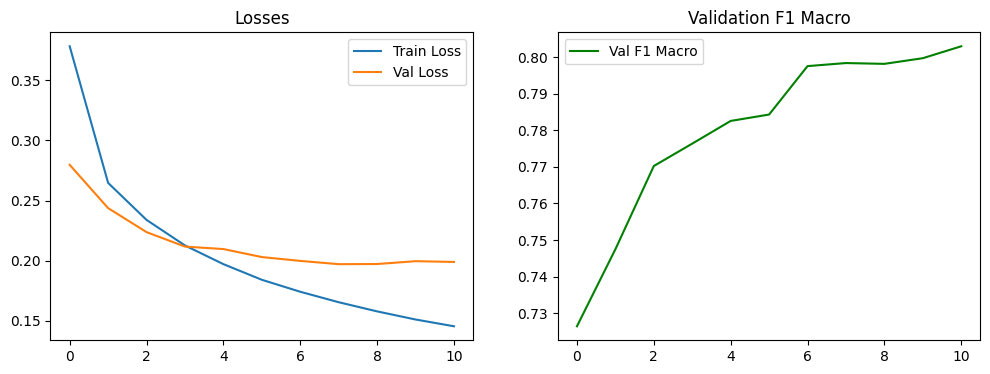

In [31]:
epoch = 20

class RussianMultiLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.FloatTensor(label) 
        }

df = train_df
texts = df['text'].values
labels = np.array([list(map(int, s.split())) for s in df['labels']])  
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2
)

model_name = 'cointegrated/rubert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_dataset = RussianMultiLabelDataset(train_texts, train_labels, tokenizer)
val_dataset = RussianMultiLabelDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

class BertMultiLabelClassifier(nn.Module):
    def __init__(self, bert_model, num_labels=20):
        super().__init__()
        self.bert = bert_model
        for param in list(self.bert.parameters())[-8:]:
            param.requires_grad = True
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)  
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        cls_token = outputs.pooler_output  
        logits = self.classifier(cls_token)
        return self.sigmoid(logits)


bert_model = AutoModel.from_pretrained(model_name)
model = BertMultiLabelClassifier(bert_model, num_labels=train_labels.shape[1])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


criterion = nn.BCELoss()  
optimizer = optim.AdamW([
    {'params': model.bert.parameters(), 'lr': 2e-5, 'weight_decay': 0.01},
    {'params': model.classifier.parameters(), 'lr': 1e-3, 'weight_decay': 0.01}
])

scheduler = get_cosine_schedule_with_warmup(
    optimizer,
    num_warmup_steps=len(train_loader),
    num_training_steps=len(train_loader) * epoch
) 

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    losses = []
    for batch in tqdm(loader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, criterion, device, threshold=0.5):
    model.eval()
    preds, true_labels = [], []
    val_losses = []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            
            preds.extend((outputs.cpu().numpy() > best_threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    
    f1_macro = f1_score(true_labels, preds, average='macro')
    avg_val_loss = np.mean(val_losses) 
    
    return f1_macro, avg_val_loss

train_losses, val_losses, val_f1_macro = [], [], []
best_threshold = find_best_threshold(model, val_loader, device)
early_stopping = EarlyStopping(patience=3)
best_f1 = 0 


for epoch in range(epoch):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    f1_macro, val_loss = eval_epoch(model, val_loader, criterion, device, threshold=best_threshold)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_f1_macro.append(f1_macro)
    
    if f1_macro  > best_f1:
        best_f1 = f1_macro
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, "best_model.pt")
        print(f"Saved new best model with F1: {best_f1:.4f}")
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}!")
        model = early_stopping.best_model  
        break
        
    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val F1: {f1_macro:.4f}")
    torch.cuda.empty_cache()
        
plot_metrics(train_losses, val_losses, val_f1_macro)        
save_model(model)


In [19]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17) 
    best_f1 = 0
    best_thresh = 0.5 
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(labels.cpu().numpy())

    all_outputs = np.vstack(all_outputs)  
    all_targets = np.vstack(all_targets)  
    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')  
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh

In [32]:
best_threshold = find_best_threshold(model, val_loader, device)

Best threshold: 0.20, F1: 0.8146


In [44]:
# import torch
# import numpy as np
# import pandas as pd
# from torch.utils.data import Dataset, DataLoader
# from transformers import AutoTokenizer, AutoModel
# from tqdm import tqdm

class TestDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze()
        }

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")


test_texts = test_df['text'].values
test_dataset = TestDataset(test_texts, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16)

bert_model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
model = BertMultiLabelClassifier(bert_model, num_labels=num_labels)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()


test_preds = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predicting"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask)
        test_preds.extend(outputs.cpu().numpy())

test_preds_bin = (np.array(test_preds) > 0.2).astype(int)
labels_str = [' '.join(map(str, row)) for row in test_preds_bin]

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': labels_str
})

print(submission.head())


/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing B

NameError: name 'submission_1' is not defined

In [45]:
print(submission.head())

      id                                   labels
0  29568  1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
1  29569  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
2  29570  0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0
3  29571  1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0
4  29572  1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1


Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validation: 100%|██████████| 344/344 [00:07<00:00, 46.19it/s]


Saved new best model with F1: 0.6355
Epoch 1: Train Loss: 0.0365 | Val Loss: 0.0304 | Val F1: 0.6355


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.32it/s]


Saved new best model with F1: 0.6753
Epoch 2: Train Loss: 0.0300 | Val Loss: 0.0290 | Val F1: 0.6753


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.48it/s]


Saved new best model with F1: 0.6970
Epoch 3: Train Loss: 0.0291 | Val Loss: 0.0283 | Val F1: 0.6970


Validation: 100%|██████████| 344/344 [00:07<00:00, 45.99it/s]


Saved new best model with F1: 0.7138
Epoch 4: Train Loss: 0.0285 | Val Loss: 0.0278 | Val F1: 0.7138


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.42it/s]


Saved new best model with F1: 0.7272
Epoch 5: Train Loss: 0.0281 | Val Loss: 0.0280 | Val F1: 0.7272


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.24it/s]


Epoch 6: Train Loss: 0.0277 | Val Loss: 0.0276 | Val F1: 0.7092


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.55it/s]


Epoch 7: Train Loss: 0.0274 | Val Loss: 0.0272 | Val F1: 0.7224


Validation: 100%|██████████| 344/344 [00:07<00:00, 46.22it/s]


Early stopping at epoch 8!


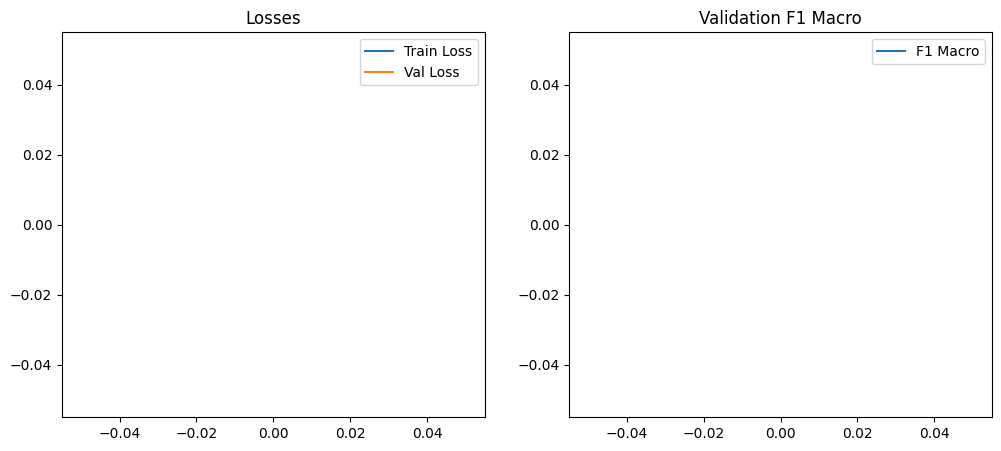

FileNotFoundError: [Errno 2] No such file or directory: 'best_model_2.pt'

In [135]:
epoch = 25

class RussianMultiLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
        
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt',
            add_special_tokens=True
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.FloatTensor(label)
        }
    
df = train_df
texts = df['text'].values
labels = np.array([list(map(int, s.split())) for s in df['labels']]) 

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2
)

model_name = 'cointegrated/rubert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_dataset = RussianMultiLabelDataset(train_texts, train_labels, tokenizer)
val_dataset = RussianMultiLabelDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

class BertMultiLabelClassifier(nn.Module):
    def __init__(self, bert_model, num_labels=20, dropout=0.2):
        super().__init__()
        self.bert = bert_model
        for param in list(self.bert.parameters())[-12:]:
            param.requires_grad = True
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, num_labels)
        )
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        cls_token = outputs.last_hidden_state[:, 0, :]  
        cls_token = self.dropout(cls_token)
        logits = self.classifier(cls_token)
        return torch.sigmoid(logits)
    
    
bert_model = AutoModel.from_pretrained(model_name)
model = BertMultiLabelClassifier(bert_model, num_labels=train_labels.shape[1])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        
    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return F_loss.mean()

criterion = FocalLoss(alpha=0.25, gamma=2)

optimizer = optim.AdamW([
    {'params': [p for n, p in model.bert.named_parameters() if 'bias' not in n and 'LayerNorm' not in n], 
     'lr': 2e-5, 'weight_decay': 0.01},
    {'params': [p for n, p in model.bert.named_parameters() if 'bias' in n or 'LayerNorm' in n], 
     'lr': 2e-5, 'weight_decay': 0.0},
    {'params': model.classifier.parameters(), 'lr': 1e-3, 'weight_decay': 0.01}
])


early_stopping = EarlyStopping(patience=7, min_delta=0.005)  

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.2 * len(train_loader) * epoch),  
    num_training_steps=len(train_loader) * epoch
)

class TrainingHistory:
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.val_f1_scores = []
    
    def update(self, train_loss, val_loss, val_f1):
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)
        self.val_f1_scores.append(val_f1)
    
    def plot(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train Loss')
        plt.plot(self.val_losses, label='Val Loss')
        plt.legend()
        plt.title('Losses')
        
        plt.subplot(1, 2, 2)
        plt.plot(self.val_f1_scores, label='F1 Macro')
        plt.legend()
        plt.title('Validation F1 Macro')
        plt.show()

history = TrainingHistory()

best_f1 = 0
no_improvement = 0 
min_delta = 0.005  


def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    losses = []
    for batch in tqdm(loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, criterion, device, threshold=0.5):
    model.eval()
    preds, true_labels = [], []
    val_losses = []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    
    f1_macro = f1_score(true_labels, preds, average='macro')
    avg_val_loss = np.mean(val_losses)
    
    return f1_macro, avg_val_loss

train_losses, val_losses, val_f1_macro = [], [], []
early_stopping = EarlyStopping(patience=7, min_delta=0.005) 
best_f1 = 0 

for epoch in range(epoch):  
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    f1_macro, val_loss = eval_epoch(model, val_loader, criterion, device, threshold=0.5)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_f1_macro.append(f1_macro)
    
    if f1_macro > best_f1 + 0.005:  
        best_f1 = f1_macro
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'f1_macro': f1_macro,
            'val_loss': val_loss,
        }, "best_model.pt")
        print(f"Saved new best model with F1: {best_f1:.4f}")
    
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}!")
        model.load_state_dict(torch.load("best_model.pt")['model_state_dict'])
        break
        
    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val F1: {f1_macro:.4f}")
    torch.cuda.empty_cache()


history.plot()



#### попытка улучшить код

In [47]:
from transformers import get_linear_schedule_with_warmup 

In [50]:
epoch = 25

class RussianMultiLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
        
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt',
            add_special_tokens=True
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.FloatTensor(label)
        }
    
df = train_df
texts = df['text'].values
labels = np.array([list(map(int, s.split())) for s in df['labels']]) 

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2
)

model_name = 'cointegrated/rubert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_dataset = RussianMultiLabelDataset(train_texts, train_labels, tokenizer)
val_dataset = RussianMultiLabelDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

class BertMultiLabelClassifier(nn.Module):
    def __init__(self, bert_model, num_labels=20, dropout=0.2):
        super().__init__()
        self.bert = bert_model
        for param in list(self.bert.parameters())[-12:]:
            param.requires_grad = True
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, num_labels)
        )
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        cls_token = outputs.last_hidden_state[:, 0, :]  
        cls_token = self.dropout(cls_token)
        logits = self.classifier(cls_token)
        return torch.sigmoid(logits)
    
    
bert_model = AutoModel.from_pretrained(model_name)
model = BertMultiLabelClassifier(bert_model, num_labels=train_labels.shape[1])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        
    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return F_loss.mean()

criterion = FocalLoss(alpha=0.25, gamma=2)

optimizer = optim.AdamW([
    {'params': [p for n, p in model.bert.named_parameters() if 'bias' not in n and 'LayerNorm' not in n], 
     'lr': 2e-5, 'weight_decay': 0.01},
    {'params': [p for n, p in model.bert.named_parameters() if 'bias' in n or 'LayerNorm' in n], 
     'lr': 2e-5, 'weight_decay': 0.0},
    {'params': model.classifier.parameters(), 'lr': 1e-3, 'weight_decay': 0.01}
])

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * len(train_loader) * epoch),
    num_training_steps=len(train_loader) * epoch
)

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    losses = []
    for batch in tqdm(loader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, criterion, device, threshold=0.5):
    model.eval()
    preds, true_labels = [], []
    val_losses = []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    
    f1_macro = f1_score(true_labels, preds, average='macro')
    avg_val_loss = np.mean(val_losses)  # Средняя ошибка на валидации
    
    return f1_macro, avg_val_loss

train_losses, val_losses, val_f1_macro = [], [], []
early_stopping = EarlyStopping(patience=3)
best_f1 = 0 


for epoch in range(epoch):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    f1_macro, val_loss = eval_epoch(model, val_loader, criterion, device, threshold=0.5)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_f1_macro.append(f1_macro)
    
    if f1_macro  > best_f1:
        best_f1 = f1_macro
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, "best_model.pt")
        print(f"Saved new best model with F1: {best_f1:.4f}")
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}!")
        model = early_stopping.best_model  # Возвращаем лучшую модель
        break
        
    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val F1: {f1_macro:.4f}")
    torch.cuda.empty_cache()

/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing B

Saved new best model with F1: 0.6544
Epoch 1: Train Loss: 0.0347 | Val Loss: 0.0297 | Val F1: 0.6544


Validation: 100%|██████████| 344/344 [00:07<00:00, 47.92it/s]


Saved new best model with F1: 0.6846
Epoch 2: Train Loss: 0.0295 | Val Loss: 0.0286 | Val F1: 0.6846


Validation: 100%|██████████| 344/344 [00:07<00:00, 47.55it/s]


Saved new best model with F1: 0.7073
Epoch 3: Train Loss: 0.0286 | Val Loss: 0.0278 | Val F1: 0.7073


Validation: 100%|██████████| 344/344 [00:07<00:00, 47.70it/s]


Saved new best model with F1: 0.7209
Epoch 4: Train Loss: 0.0280 | Val Loss: 0.0276 | Val F1: 0.7209


Validation: 100%|██████████| 344/344 [00:07<00:00, 47.85it/s]


Epoch 5: Train Loss: 0.0276 | Val Loss: 0.0274 | Val F1: 0.7186


Validation: 100%|██████████| 344/344 [00:07<00:00, 48.13it/s]


Saved new best model with F1: 0.7265
Epoch 6: Train Loss: 0.0274 | Val Loss: 0.0272 | Val F1: 0.7265


Validation: 100%|██████████| 344/344 [00:07<00:00, 47.33it/s]


Saved new best model with F1: 0.7269
Epoch 7: Train Loss: 0.0272 | Val Loss: 0.0271 | Val F1: 0.7269


Validation: 100%|██████████| 344/344 [00:07<00:00, 48.01it/s]


Saved new best model with F1: 0.7312
Early stopping at epoch 8!


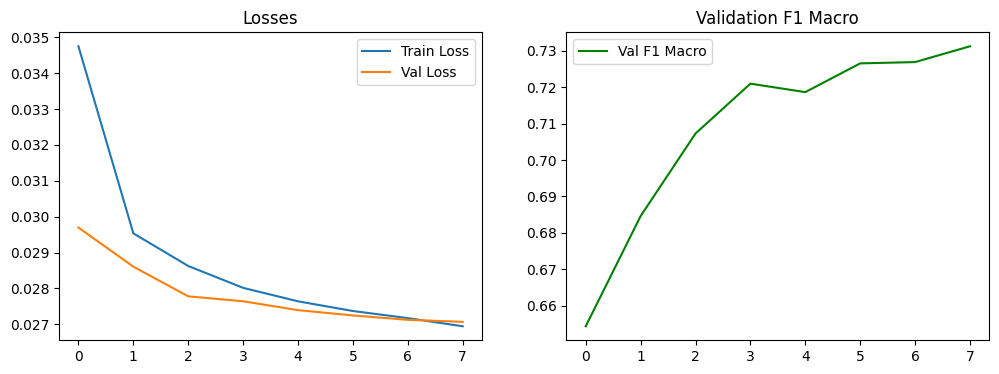

In [51]:
plot_metrics(train_losses, val_losses, val_f1_macro)        
save_model(model)

В общем первый вариант был лучшим

# Tf-Idf

In [21]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

In [104]:
import re

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)


In [103]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\sа-яё0-9:]', ' ', text)
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and (len(token) > 2 or token.isdigit())]
    return ' '.join(tokens)

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

stemmer = SnowballStemmer("russian")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

y = np.array([list(map(int, x.split())) for x in train_df['labels']])

In [107]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


In [108]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TfidfMLP(
  (model): Sequential(
    (0): Linear(in_features=30000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=20, bias=True)
    (7): Sigmoid()
  )
)

In [127]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.15):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

In [128]:
for epoch in range(30):
    train_loss = train_epoch(model, train_loader)
    f1_micro, f1_macro = eval_epoch(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

Val: 100%|██████████| 86/86 [00:00<00:00, 112.12it/s]


Epoch 1: Loss=0.3471, F1_micro=0.8627, F1_macro=0.7487


Val: 100%|██████████| 86/86 [00:00<00:00, 111.49it/s]


Epoch 2: Loss=0.2213, F1_micro=0.8848, F1_macro=0.7815


Val: 100%|██████████| 86/86 [00:00<00:00, 108.87it/s]


Epoch 3: Loss=0.1722, F1_micro=0.8974, F1_macro=0.8003


Val: 100%|██████████| 86/86 [00:00<00:00, 109.18it/s]


Epoch 4: Loss=0.1371, F1_micro=0.9045, F1_macro=0.8133


Val: 100%|██████████| 86/86 [00:00<00:00, 110.33it/s]


Epoch 5: Loss=0.1117, F1_micro=0.9079, F1_macro=0.8219


Val: 100%|██████████| 86/86 [00:00<00:00, 114.39it/s]


Epoch 6: Loss=0.0937, F1_micro=0.9116, F1_macro=0.8278


Val: 100%|██████████| 86/86 [00:00<00:00, 113.20it/s]


Epoch 7: Loss=0.0782, F1_micro=0.9138, F1_macro=0.8260


Val: 100%|██████████| 86/86 [00:00<00:00, 109.56it/s]


Epoch 8: Loss=0.0672, F1_micro=0.9157, F1_macro=0.8329


Val: 100%|██████████| 86/86 [00:00<00:00, 107.06it/s]


Epoch 9: Loss=0.0580, F1_micro=0.9151, F1_macro=0.8296


Val: 100%|██████████| 86/86 [00:00<00:00, 110.89it/s]


Epoch 10: Loss=0.0511, F1_micro=0.9159, F1_macro=0.8329


Val: 100%|██████████| 86/86 [00:00<00:00, 112.12it/s]


Epoch 11: Loss=0.0463, F1_micro=0.9169, F1_macro=0.8317


Val: 100%|██████████| 86/86 [00:00<00:00, 113.78it/s]


Epoch 12: Loss=0.0426, F1_micro=0.9164, F1_macro=0.8360


Val: 100%|██████████| 86/86 [00:00<00:00, 111.12it/s]


Epoch 13: Loss=0.0388, F1_micro=0.9176, F1_macro=0.8314


Val: 100%|██████████| 86/86 [00:00<00:00, 110.48it/s]


Epoch 14: Loss=0.0358, F1_micro=0.9172, F1_macro=0.8369


Val: 100%|██████████| 86/86 [00:00<00:00, 113.00it/s]


Epoch 15: Loss=0.0327, F1_micro=0.9180, F1_macro=0.8370


Val: 100%|██████████| 86/86 [00:00<00:00, 111.65it/s]


Epoch 16: Loss=0.0305, F1_micro=0.9171, F1_macro=0.8373


Val: 100%|██████████| 86/86 [00:00<00:00, 110.82it/s]


Epoch 17: Loss=0.0286, F1_micro=0.9178, F1_macro=0.8301


Val: 100%|██████████| 86/86 [00:00<00:00, 106.13it/s]


Epoch 18: Loss=0.0270, F1_micro=0.9175, F1_macro=0.8370


Val: 100%|██████████| 86/86 [00:00<00:00, 112.84it/s]


Epoch 19: Loss=0.0255, F1_micro=0.9175, F1_macro=0.8348


Val: 100%|██████████| 86/86 [00:00<00:00, 112.76it/s]


Epoch 20: Loss=0.0241, F1_micro=0.9182, F1_macro=0.8358


Val: 100%|██████████| 86/86 [00:00<00:00, 113.42it/s]


Epoch 21: Loss=0.0239, F1_micro=0.9174, F1_macro=0.8380


Val: 100%|██████████| 86/86 [00:00<00:00, 110.22it/s]


Epoch 22: Loss=0.0221, F1_micro=0.9176, F1_macro=0.8349


Val: 100%|██████████| 86/86 [00:00<00:00, 108.50it/s]


Epoch 23: Loss=0.0210, F1_micro=0.9174, F1_macro=0.8326


Val: 100%|██████████| 86/86 [00:00<00:00, 109.60it/s]


Epoch 24: Loss=0.0204, F1_micro=0.9171, F1_macro=0.8355


Val: 100%|██████████| 86/86 [00:00<00:00, 112.37it/s]


Epoch 25: Loss=0.0191, F1_micro=0.9180, F1_macro=0.8394


Val: 100%|██████████| 86/86 [00:00<00:00, 109.57it/s]


Epoch 26: Loss=0.0187, F1_micro=0.9179, F1_macro=0.8426


Val: 100%|██████████| 86/86 [00:00<00:00, 110.23it/s]


Epoch 27: Loss=0.0180, F1_micro=0.9177, F1_macro=0.8406


Val: 100%|██████████| 86/86 [00:00<00:00, 108.67it/s]


Epoch 28: Loss=0.0176, F1_micro=0.9173, F1_macro=0.8376


Val: 100%|██████████| 86/86 [00:00<00:00, 108.89it/s]


Epoch 29: Loss=0.0167, F1_micro=0.9177, F1_macro=0.8387


Val: 100%|██████████| 86/86 [00:00<00:00, 114.12it/s]

Epoch 30: Loss=0.0168, F1_micro=0.9172, F1_macro=0.8364


In [131]:
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.3).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_4.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 112.16it/s]


In [132]:
pd.read_csv('submission_tfidf_mlp_4.csv')

,id,labels
0,29568,1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0
1,29569,0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
2,29570,0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
3,29571,1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
4,29572,1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0
...,...,...
7387,36955,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
7388,36956,1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
7389,36957,0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
7390,36958,1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0


In [17]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.38it/s]


Saved best model with F1 Macro: 0.6199
Epoch 1: Train Loss: 0.6491 | Val Loss: 0.5880 | F1 Micro: 0.8256 | F1 Macro: 0.6199


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.36it/s] 


Saved best model with F1 Macro: 0.6454
Epoch 2: Train Loss: 0.5789 | Val Loss: 0.5723 | F1 Micro: 0.8475 | F1 Macro: 0.6454


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.66it/s] 


Saved best model with F1 Macro: 0.6555
Epoch 3: Train Loss: 0.5641 | Val Loss: 0.5636 | F1 Micro: 0.8616 | F1 Macro: 0.6555


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.09it/s]


Saved best model with F1 Macro: 0.6578
Epoch 4: Train Loss: 0.5568 | Val Loss: 0.5619 | F1 Micro: 0.8645 | F1 Macro: 0.6578


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 97.76it/s]


Saved best model with F1 Macro: 0.6602
Epoch 5: Train Loss: 0.5522 | Val Loss: 0.5596 | F1 Micro: 0.8665 | F1 Macro: 0.6602


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.88it/s]


Saved best model with F1 Macro: 0.6616
Early stopping triggered at epoch 6!


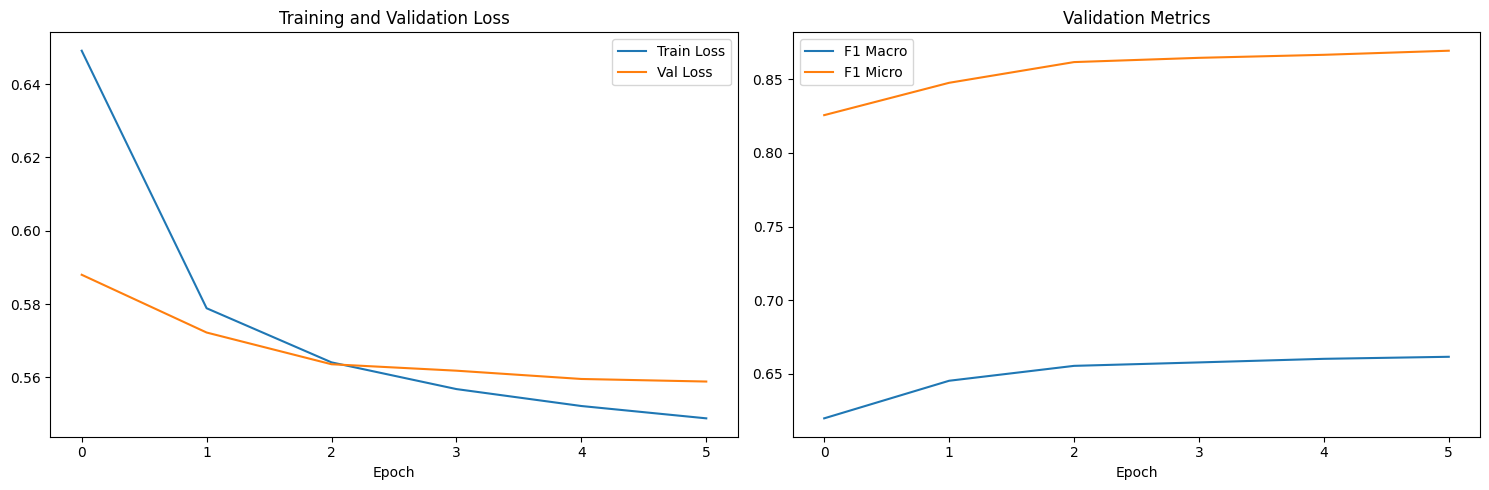

Loaded best model from epoch 5 with F1 Macro: 0.6616


In [131]:
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

class TrainingVisualizer:
    def __init__(self):
        self.metrics = defaultdict(list)
    
    def update(self, metrics_dict):
        for key, value in metrics_dict.items():
            self.metrics[key].append(value)
    
    def plot(self):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.metrics['train_loss'], label='Train Loss')
        plt.plot(self.metrics['val_loss'], label='Val Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.metrics['f1_macro'], label='F1 Macro')
        plt.plot(self.metrics['f1_micro'], label='F1 Micro')
        plt.title('Validation Metrics')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

visualizer = TrainingVisualizer()

class EarlyStopper:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
    
    def should_stop(self, current_score):
        if self.best_score is None:
            self.best_score = current_score
            return False
        elif current_score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = current_score
            self.counter = 0
        return False

early_stopper = EarlyStopper(patience=5)

def train_epoch(model, loader, optimizer, scheduler, criterion):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Training'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        losses.append(loss.item())
    return np.mean(losses)

def evaluate(model, loader, criterion, threshold=0.15):
    model.eval()
    val_losses = []
    preds, true_labels = [], []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc='Evaluating'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    avg_loss = np.mean(val_losses)
    
    return avg_loss, f1_micro, f1_macro

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1]).to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)

total_steps = len(train_loader) * 30
warmup_steps = int(0.1 * total_steps)

scheduler = torch.optim.lr_scheduler.SequentialLR(
    optimizer,
    schedulers=[
        LinearLR(optimizer, start_factor=0.01, total_iters=warmup_steps),
        CosineAnnealingLR(optimizer, T_max=total_steps - warmup_steps)
    ],
    milestones=[warmup_steps]
)

best_f1 = 0
for epoch in range(30):
    # Обучение
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, criterion)
    
    # Валидация
    val_loss, f1_micro, f1_macro = evaluate(model, val_loader, criterion)
    
    visualizer.update({
        'train_loss': train_loss,
        'val_loss': val_loss,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro
    })
    
    if f1_macro > best_f1:
        best_f1 = f1_macro
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'f1_macro': f1_macro,
            'val_loss': val_loss,
        }, 'best_model.pth')
        print(f"Saved best model with F1 Macro: {f1_macro:.4f}")
    
    if early_stopper.should_stop(-f1_macro):  # Используем -f1 так как ищем максимум
        print(f"Early stopping triggered at epoch {epoch+1}!")
        break
    
    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
          f"F1 Micro: {f1_micro:.4f} | F1 Macro: {f1_macro:.4f}")

# 6. Визуализация результатов
visualizer.plot()

checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
print(f"Loaded best model from epoch {checkpoint['epoch']} with F1 Macro: {checkpoint['f1_macro']:.4f}")

Получилось как то слишком агрессивно, попробуем сделать модель более мягче

In [111]:
class TrainingVisualizer:
    def __init__(self):
        self.metrics = defaultdict(list)
    
    def update(self, metrics_dict):
        for key, value in metrics_dict.items():
            self.metrics[key].append(value)
    
    def plot(self):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.metrics['train_loss'], label='Train Loss')
        plt.plot(self.metrics['val_loss'], label='Val Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.metrics['f1_macro'], label='F1 Macro')
        plt.plot(self.metrics['f1_micro'], label='F1 Micro')
        plt.title('Validation Metrics')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

visualizer = TrainingVisualizer()

class EarlyStopper:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
    
    def should_stop(self, current_score):
        if self.best_score is None:
            self.best_score = current_score
            return False
        elif current_score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = current_score
            self.counter = 0
        return False

early_stopper = EarlyStopper(patience=5)

def train_epoch(model, loader, optimizer, scheduler, criterion):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Training'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        losses.append(loss.item())
    return np.mean(losses)

def evaluate(model, loader, criterion, threshold=0.15):
    model.eval()
    val_losses = []
    preds, true_labels = [], []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc='Evaluating'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())
            
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    avg_loss = np.mean(val_losses)
    
    return avg_loss, f1_micro, f1_macro

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1]).to(device)

early_stopper = EarlyStopper(patience=10, min_delta=0.005)  

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.001) 


total_steps = len(train_loader) * 30
warmup_steps = int(0.2 * total_steps)  

scheduler = torch.optim.lr_scheduler.SequentialLR(
    optimizer,
    schedulers=[
        LinearLR(optimizer, start_factor=0.1, total_iters=warmup_steps),  
        CosineAnnealingLR(optimizer, T_max=total_steps - warmup_steps, eta_min=1e-5)  
    ],
    milestones=[warmup_steps]
)

best_f1 = 0
no_improve = 0  

for epoch in range(30):
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, criterion)
    val_loss, f1_micro, f1_macro = evaluate(model, val_loader, criterion)
    
    visualizer.update({
        'train_loss': train_loss,
        'val_loss': val_loss,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro
    })
    
    if f1_macro > best_f1 + 0.001:  
        best_f1 = f1_macro
        no_improve = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'f1_macro': f1_macro,
            'val_loss': val_loss,
        }, 'best_model.pth')
        print(f"Saved best model with F1 Macro: {f1_macro:.4f}")
    else:
        no_improve += 1
    
    if no_improve >= 10:  
        print(f"Early stopping triggered at epoch {epoch+1}!")
        break
    
    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
          f"F1 Micro: {f1_micro:.4f} | F1 Macro: {f1_macro:.4f} | "
          f"LR: {optimizer.param_groups[0]['lr']:.2e}")

Evaluating: 100%|██████████| 86/86 [00:00<00:00, 101.13it/s]


Saved best model with F1 Macro: 0.6809
Epoch 1: Train Loss: 0.4897 | Val Loss: 0.3490 | F1 Micro: 0.8238 | F1 Macro: 0.6809 | LR: 2.50e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.37it/s]


Saved best model with F1 Macro: 0.7114
Epoch 2: Train Loss: 0.3115 | Val Loss: 0.2794 | F1 Micro: 0.8517 | F1 Macro: 0.7114 | LR: 4.00e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 100.04it/s]


Saved best model with F1 Macro: 0.7538
Epoch 3: Train Loss: 0.2447 | Val Loss: 0.2454 | F1 Micro: 0.8718 | F1 Macro: 0.7538 | LR: 5.50e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.10it/s]


Saved best model with F1 Macro: 0.7704
Epoch 4: Train Loss: 0.2008 | Val Loss: 0.2297 | F1 Micro: 0.8844 | F1 Macro: 0.7704 | LR: 7.00e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.66it/s]


Saved best model with F1 Macro: 0.7891
Epoch 5: Train Loss: 0.1660 | Val Loss: 0.2282 | F1 Micro: 0.8950 | F1 Macro: 0.7891 | LR: 8.50e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.92it/s]


Saved best model with F1 Macro: 0.8008
Epoch 6: Train Loss: 0.1370 | Val Loss: 0.2363 | F1 Micro: 0.8986 | F1 Macro: 0.8008 | LR: 1.00e-03


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.79it/s] 


Saved best model with F1 Macro: 0.8043
Epoch 7: Train Loss: 0.1130 | Val Loss: 0.2487 | F1 Micro: 0.9047 | F1 Macro: 0.8043 | LR: 9.96e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 97.31it/s] 


Saved best model with F1 Macro: 0.8167
Epoch 8: Train Loss: 0.0923 | Val Loss: 0.2738 | F1 Micro: 0.9072 | F1 Macro: 0.8167 | LR: 9.83e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 100.12it/s]


Saved best model with F1 Macro: 0.8177
Epoch 9: Train Loss: 0.0763 | Val Loss: 0.2908 | F1 Micro: 0.9085 | F1 Macro: 0.8177 | LR: 9.62e-04


IOStream.flush timed out
Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.51it/s] 


Epoch 10: Train Loss: 0.0652 | Val Loss: 0.3163 | F1 Micro: 0.9099 | F1 Macro: 0.8187 | LR: 9.34e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.51it/s] 


Saved best model with F1 Macro: 0.8238
Epoch 11: Train Loss: 0.0567 | Val Loss: 0.3396 | F1 Micro: 0.9107 | F1 Macro: 0.8238 | LR: 8.98e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.00it/s]


Epoch 12: Train Loss: 0.0487 | Val Loss: 0.3596 | F1 Micro: 0.9111 | F1 Macro: 0.8222 | LR: 8.55e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.33it/s] 


Epoch 13: Train Loss: 0.0443 | Val Loss: 0.3770 | F1 Micro: 0.9113 | F1 Macro: 0.8193 | LR: 8.06e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 97.19it/s]


Epoch 14: Train Loss: 0.0393 | Val Loss: 0.4075 | F1 Micro: 0.9117 | F1 Macro: 0.8188 | LR: 7.52e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.52it/s]


Epoch 15: Train Loss: 0.0349 | Val Loss: 0.4398 | F1 Micro: 0.9117 | F1 Macro: 0.8235 | LR: 6.94e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 99.20it/s] 


Epoch 16: Train Loss: 0.0320 | Val Loss: 0.4621 | F1 Micro: 0.9112 | F1 Macro: 0.8222 | LR: 6.33e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.32it/s] 


Epoch 17: Train Loss: 0.0289 | Val Loss: 0.4810 | F1 Micro: 0.9117 | F1 Macro: 0.8228 | LR: 5.70e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 96.26it/s]


Epoch 18: Train Loss: 0.0262 | Val Loss: 0.5247 | F1 Micro: 0.9115 | F1 Macro: 0.8178 | LR: 5.05e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 97.76it/s]


Epoch 19: Train Loss: 0.0239 | Val Loss: 0.5395 | F1 Micro: 0.9116 | F1 Macro: 0.8215 | LR: 4.40e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 97.94it/s]


Epoch 20: Train Loss: 0.0219 | Val Loss: 0.5606 | F1 Micro: 0.9123 | F1 Macro: 0.8232 | LR: 3.77e-04


Evaluating: 100%|██████████| 86/86 [00:00<00:00, 98.61it/s]


Early stopping triggered at epoch 21!


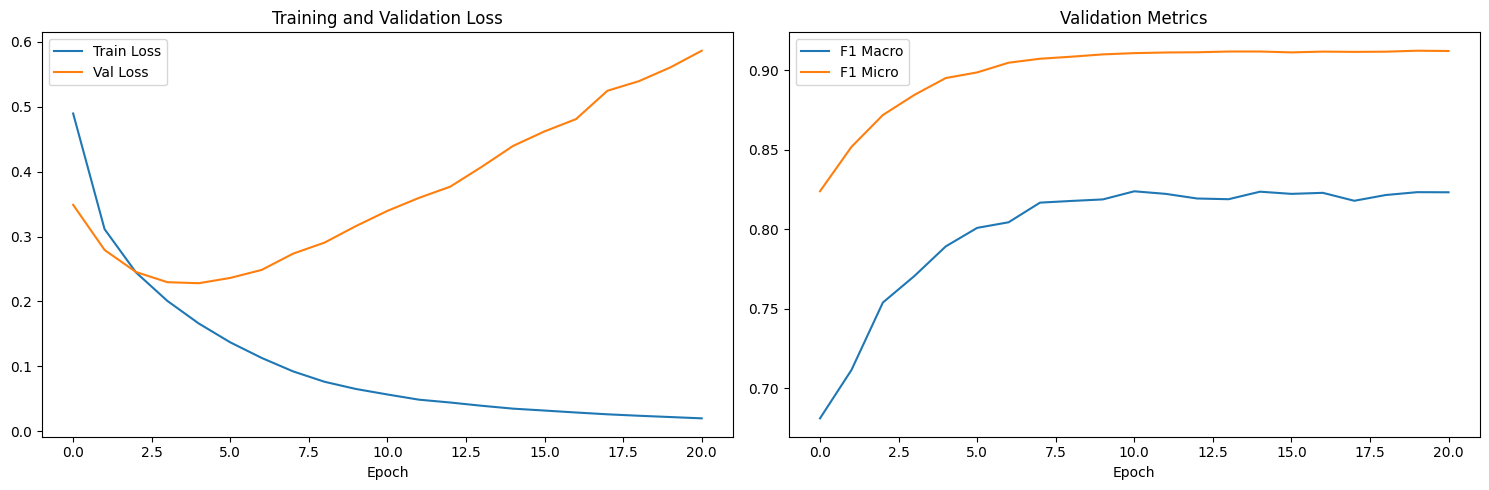

Loaded best model from epoch 10 with F1 Macro: 0.8238


In [113]:
visualizer.plot()
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
print(f"Loaded best model from epoch {checkpoint['epoch']} with F1 Macro: {checkpoint['f1_macro']:.4f}")

Что то страшное с валидационной ошибкой происходит, но скор вырос...

In [118]:
model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1]).to(device)
model.load_state_dict(torch.load('best_model.pth')['model_state_dict'])

model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.3).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_03.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 100.06it/s]


In [ ]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


In [116]:
best_threshold = find_best_threshold(model, val_loader, device)

Best threshold: 0.15, F1: 0.8238


In [59]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\sа-яё0-9:]', ' ', text)
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and (len(token) > 2 or token.isdigit())]
    return ' '.join(tokens)

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

y = np.array([list(map(int, x.split())) for x in train_df['labels']])

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


In [67]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TfidfMLP(
  (model): Sequential(
    (0): Linear(in_features=30000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=20, bias=True)
    (7): Sigmoid()
  )
)

In [68]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.15):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

In [69]:
for epoch in range(30):
    train_loss = train_epoch(model, train_loader)
    f1_micro, f1_macro = eval_epoch(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

Val: 100%|██████████| 93/93 [00:00<00:00, 97.21it/s]


Epoch 1: Loss=0.3404, F1_micro=0.8654, F1_macro=0.7519


Val: 100%|██████████| 93/93 [00:00<00:00, 98.98it/s]


Epoch 2: Loss=0.2118, F1_micro=0.8861, F1_macro=0.7769


Val: 100%|██████████| 93/93 [00:00<00:00, 101.02it/s]


Epoch 3: Loss=0.1609, F1_micro=0.9025, F1_macro=0.7995


Val: 100%|██████████| 93/93 [00:00<00:00, 99.56it/s]


Epoch 4: Loss=0.1270, F1_micro=0.9097, F1_macro=0.8162


Val: 100%|██████████| 93/93 [00:00<00:00, 96.40it/s]


Epoch 5: Loss=0.1017, F1_micro=0.9128, F1_macro=0.8272


Val: 100%|██████████| 93/93 [00:00<00:00, 99.49it/s] 


Epoch 6: Loss=0.0837, F1_micro=0.9182, F1_macro=0.8309


Val: 100%|██████████| 93/93 [00:00<00:00, 100.53it/s]


Epoch 7: Loss=0.0712, F1_micro=0.9188, F1_macro=0.8337


Val: 100%|██████████| 93/93 [00:00<00:00, 98.69it/s] 


Epoch 8: Loss=0.0616, F1_micro=0.9205, F1_macro=0.8372


Val: 100%|██████████| 93/93 [00:00<00:00, 98.06it/s]


Epoch 9: Loss=0.0541, F1_micro=0.9201, F1_macro=0.8378


Val: 100%|██████████| 93/93 [00:00<00:00, 99.65it/s] 


Epoch 10: Loss=0.0483, F1_micro=0.9212, F1_macro=0.8383


Val: 100%|██████████| 93/93 [00:00<00:00, 100.77it/s]


Epoch 11: Loss=0.0437, F1_micro=0.9212, F1_macro=0.8388


Val: 100%|██████████| 93/93 [00:00<00:00, 99.90it/s] 


Epoch 12: Loss=0.0401, F1_micro=0.9220, F1_macro=0.8415


Val: 100%|██████████| 93/93 [00:00<00:00, 98.49it/s] 


Epoch 13: Loss=0.0366, F1_micro=0.9216, F1_macro=0.8432


Val: 100%|██████████| 93/93 [00:00<00:00, 100.88it/s]


Epoch 14: Loss=0.0341, F1_micro=0.9216, F1_macro=0.8416


Val: 100%|██████████| 93/93 [00:00<00:00, 100.35it/s]


Epoch 15: Loss=0.0310, F1_micro=0.9219, F1_macro=0.8421


Val: 100%|██████████| 93/93 [00:00<00:00, 99.94it/s] 


Epoch 16: Loss=0.0292, F1_micro=0.9215, F1_macro=0.8393


Val: 100%|██████████| 93/93 [00:00<00:00, 98.40it/s] 


Epoch 17: Loss=0.0277, F1_micro=0.9223, F1_macro=0.8447


Val: 100%|██████████| 93/93 [00:00<00:00, 99.09it/s]


Epoch 18: Loss=0.0262, F1_micro=0.9223, F1_macro=0.8407


Val: 100%|██████████| 93/93 [00:00<00:00, 100.43it/s]


Epoch 19: Loss=0.0252, F1_micro=0.9226, F1_macro=0.8448


Val: 100%|██████████| 93/93 [00:00<00:00, 100.39it/s]


Epoch 20: Loss=0.0239, F1_micro=0.9226, F1_macro=0.8416


Val: 100%|██████████| 93/93 [00:00<00:00, 98.61it/s]


Epoch 21: Loss=0.0226, F1_micro=0.9219, F1_macro=0.8434


Val: 100%|██████████| 93/93 [00:00<00:00, 98.50it/s]


Epoch 22: Loss=0.0220, F1_micro=0.9226, F1_macro=0.8443


Val: 100%|██████████| 93/93 [00:00<00:00, 99.71it/s] 


Epoch 23: Loss=0.0215, F1_micro=0.9222, F1_macro=0.8422


Val: 100%|██████████| 93/93 [00:00<00:00, 99.44it/s] 


Epoch 24: Loss=0.0204, F1_micro=0.9221, F1_macro=0.8419


Val: 100%|██████████| 93/93 [00:00<00:00, 98.55it/s]


Epoch 25: Loss=0.0195, F1_micro=0.9227, F1_macro=0.8431


Val: 100%|██████████| 93/93 [00:00<00:00, 98.78it/s] 


Epoch 26: Loss=0.0183, F1_micro=0.9225, F1_macro=0.8436


Val: 100%|██████████| 93/93 [00:00<00:00, 98.34it/s]


Epoch 27: Loss=0.0184, F1_micro=0.9221, F1_macro=0.8432


Val: 100%|██████████| 93/93 [00:00<00:00, 100.37it/s]


Epoch 28: Loss=0.0179, F1_micro=0.9225, F1_macro=0.8427


Val: 100%|██████████| 93/93 [00:00<00:00, 97.69it/s]


Epoch 29: Loss=0.0175, F1_micro=0.9218, F1_macro=0.8440


Val: 100%|██████████| 93/93 [00:00<00:00, 99.25it/s] 


Epoch 30: Loss=0.0171, F1_micro=0.9224, F1_macro=0.8421


In [72]:
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.3).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_80.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 104.43it/s]


In [70]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


In [71]:
thresh = find_best_threshold(model, val_loader, device)

Best threshold: 0.30, F1: 0.8430


In [23]:

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

In [25]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

y = np.array([list(map(int, x.split())) for x in train_df['labels']])

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


In [27]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TfidfMLP(
  (model): Sequential(
    (0): Linear(in_features=30000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=20, bias=True)
    (7): Sigmoid()
  )
)

In [29]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.15):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

In [84]:
for epoch in range(30):
    train_loss = train_epoch(model, train_loader)
    f1_micro, f1_macro = eval_epoch(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

Val: 100%|██████████| 86/86 [00:00<00:00, 98.01it/s]


Epoch 1: Loss=0.3529, F1_micro=0.8601, F1_macro=0.7454


Val: 100%|██████████| 86/86 [00:00<00:00, 100.15it/s]


Epoch 2: Loss=0.2250, F1_micro=0.8805, F1_macro=0.7839


Val: 100%|██████████| 86/86 [00:00<00:00, 98.30it/s]


Epoch 3: Loss=0.1734, F1_micro=0.8937, F1_macro=0.8042


Val: 100%|██████████| 86/86 [00:00<00:00, 98.81it/s]


Epoch 4: Loss=0.1384, F1_micro=0.8991, F1_macro=0.8093


Val: 100%|██████████| 86/86 [00:00<00:00, 98.10it/s]


Epoch 5: Loss=0.1120, F1_micro=0.9063, F1_macro=0.8180


Val: 100%|██████████| 86/86 [00:00<00:00, 96.60it/s]


Epoch 6: Loss=0.0939, F1_micro=0.9079, F1_macro=0.8282


Val: 100%|██████████| 86/86 [00:00<00:00, 97.08it/s]


Epoch 7: Loss=0.0786, F1_micro=0.9077, F1_macro=0.8260


Val: 100%|██████████| 86/86 [00:00<00:00, 94.81it/s]


Epoch 8: Loss=0.0683, F1_micro=0.9100, F1_macro=0.8265


Val: 100%|██████████| 86/86 [00:00<00:00, 94.76it/s]


Epoch 9: Loss=0.0605, F1_micro=0.9124, F1_macro=0.8301


Val: 100%|██████████| 86/86 [00:00<00:00, 97.35it/s]


Epoch 10: Loss=0.0538, F1_micro=0.9125, F1_macro=0.8430


Val: 100%|██████████| 86/86 [00:00<00:00, 99.46it/s] 


Epoch 11: Loss=0.0480, F1_micro=0.9123, F1_macro=0.8360


Val: 100%|██████████| 86/86 [00:00<00:00, 97.10it/s]


Epoch 12: Loss=0.0444, F1_micro=0.9118, F1_macro=0.8370


Val: 100%|██████████| 86/86 [00:00<00:00, 97.31it/s]


Epoch 13: Loss=0.0409, F1_micro=0.9120, F1_macro=0.8302


Val: 100%|██████████| 86/86 [00:00<00:00, 99.71it/s] 


Epoch 14: Loss=0.0378, F1_micro=0.9124, F1_macro=0.8342


Val: 100%|██████████| 86/86 [00:00<00:00, 98.26it/s]


Epoch 15: Loss=0.0349, F1_micro=0.9123, F1_macro=0.8316


Val: 100%|██████████| 86/86 [00:00<00:00, 98.83it/s]


Epoch 16: Loss=0.0334, F1_micro=0.9120, F1_macro=0.8377


Val: 100%|██████████| 86/86 [00:00<00:00, 99.25it/s] 


Epoch 17: Loss=0.0315, F1_micro=0.9136, F1_macro=0.8365


Val: 100%|██████████| 86/86 [00:00<00:00, 98.74it/s]


Epoch 18: Loss=0.0301, F1_micro=0.9118, F1_macro=0.8372


Val: 100%|██████████| 86/86 [00:00<00:00, 96.63it/s]


Epoch 19: Loss=0.0279, F1_micro=0.9122, F1_macro=0.8401


Val: 100%|██████████| 86/86 [00:00<00:00, 98.30it/s] 


Epoch 20: Loss=0.0267, F1_micro=0.9118, F1_macro=0.8385


Val: 100%|██████████| 86/86 [00:00<00:00, 95.73it/s]


Epoch 21: Loss=0.0254, F1_micro=0.9123, F1_macro=0.8392


Val: 100%|██████████| 86/86 [00:00<00:00, 97.69it/s] 


Epoch 22: Loss=0.0247, F1_micro=0.9120, F1_macro=0.8376


Val: 100%|██████████| 86/86 [00:00<00:00, 100.22it/s]


Epoch 23: Loss=0.0232, F1_micro=0.9120, F1_macro=0.8382


Val: 100%|██████████| 86/86 [00:00<00:00, 97.33it/s]


Epoch 24: Loss=0.0227, F1_micro=0.9125, F1_macro=0.8371


Val: 100%|██████████| 86/86 [00:00<00:00, 95.87it/s]


Epoch 25: Loss=0.0220, F1_micro=0.9128, F1_macro=0.8404


Val: 100%|██████████| 86/86 [00:00<00:00, 96.80it/s]


Epoch 26: Loss=0.0220, F1_micro=0.9121, F1_macro=0.8413


Val: 100%|██████████| 86/86 [00:00<00:00, 99.03it/s]


Epoch 27: Loss=0.0205, F1_micro=0.9123, F1_macro=0.8356


Val: 100%|██████████| 86/86 [00:00<00:00, 96.09it/s]


Epoch 28: Loss=0.0203, F1_micro=0.9120, F1_macro=0.8347


Val: 100%|██████████| 86/86 [00:00<00:00, 98.66it/s] 


Epoch 29: Loss=0.0190, F1_micro=0.9121, F1_macro=0.8387


Val: 100%|██████████| 86/86 [00:00<00:00, 99.37it/s]


Epoch 30: Loss=0.0187, F1_micro=0.9122, F1_macro=0.8405


In [85]:
thresh = find_best_threshold(model, val_loader, device)

Best threshold: 0.15, F1: 0.8405


In [87]:
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.15).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_90.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 101.30it/s]


## Итоговый tf-idf

Снабдим нашу модель всем необхоимым для обучения: шедулер, вормап, ранняя остановка и т.д....

Epoch 1/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.01it/s]


Loss=0.4111, F1_micro=0.8373, F1_macro=0.7041
Модель сохранена!
Epoch 2/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.20it/s]


Loss=0.2627, F1_micro=0.8715, F1_macro=0.7585
Модель сохранена!
Epoch 3/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.85it/s]


Loss=0.2026, F1_micro=0.8863, F1_macro=0.7807
Модель сохранена!
Epoch 4/30


Val: 100%|██████████| 93/93 [00:00<00:00, 110.13it/s]


Loss=0.1557, F1_micro=0.8978, F1_macro=0.8016
Модель сохранена!
Epoch 5/30


Val: 100%|██████████| 93/93 [00:00<00:00, 108.63it/s]


Loss=0.1230, F1_micro=0.9068, F1_macro=0.8208
Модель сохранена!
Epoch 6/30


Val: 100%|██████████| 93/93 [00:00<00:00, 106.98it/s]


Loss=0.1001, F1_micro=0.9117, F1_macro=0.8239
Модель сохранена!
Epoch 7/30


Val: 100%|██████████| 93/93 [00:00<00:00, 103.24it/s]


Loss=0.0830, F1_micro=0.9148, F1_macro=0.8333
Модель сохранена!
Epoch 8/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.64it/s]


Loss=0.0708, F1_micro=0.9154, F1_macro=0.8375
Модель сохранена!
Epoch 9/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.90it/s]


Loss=0.0624, F1_micro=0.9164, F1_macro=0.8387
Модель сохранена!
Epoch 10/30


Val: 100%|██████████| 93/93 [00:00<00:00, 102.52it/s]


Loss=0.0552, F1_micro=0.9177, F1_macro=0.8384
Модель сохранена!
Epoch 11/30


Val: 100%|██████████| 93/93 [00:00<00:00, 106.86it/s]


Loss=0.0493, F1_micro=0.9174, F1_macro=0.8384
Epoch 12/30


Val: 100%|██████████| 93/93 [00:00<00:00, 105.57it/s]


Loss=0.0459, F1_micro=0.9179, F1_macro=0.8401
Модель сохранена!
Epoch 13/30


Val: 100%|██████████| 93/93 [00:00<00:00, 104.64it/s]


Loss=0.0417, F1_micro=0.9177, F1_macro=0.8410
Epoch 14/30


Val: 100%|██████████| 93/93 [00:00<00:00, 103.32it/s]


Loss=0.0387, F1_micro=0.9180, F1_macro=0.8431
Модель сохранена!
Epoch 15/30


Val: 100%|██████████| 93/93 [00:00<00:00, 105.11it/s]


Loss=0.0355, F1_micro=0.9181, F1_macro=0.8413
Модель сохранена!
Epoch 16/30


Val: 100%|██████████| 93/93 [00:00<00:00, 109.78it/s]


Loss=0.0332, F1_micro=0.9181, F1_macro=0.8423
Epoch 17/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.20it/s]


Loss=0.0325, F1_micro=0.9185, F1_macro=0.8455
Модель сохранена!
Epoch 18/30


Val: 100%|██████████| 93/93 [00:00<00:00, 100.87it/s]


Loss=0.0301, F1_micro=0.9180, F1_macro=0.8425
Epoch 19/30


Val: 100%|██████████| 93/93 [00:00<00:00, 102.13it/s]


Loss=0.0283, F1_micro=0.9186, F1_macro=0.8409
Модель сохранена!
Epoch 20/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.28it/s]


Loss=0.0266, F1_micro=0.9188, F1_macro=0.8419
Модель сохранена!
Epoch 21/30


Val: 100%|██████████| 93/93 [00:00<00:00, 100.11it/s]


Loss=0.0261, F1_micro=0.9184, F1_macro=0.8423
Epoch 22/30


Val: 100%|██████████| 93/93 [00:00<00:00, 99.60it/s]


Loss=0.0247, F1_micro=0.9188, F1_macro=0.8440
Epoch 23/30


Val: 100%|██████████| 93/93 [00:00<00:00, 101.49it/s]


Loss=0.0241, F1_micro=0.9189, F1_macro=0.8422
Epoch 00020: reducing learning rate of group 0 to 5.0000e-04.
Модель сохранена!
Epoch 24/30


Val: 100%|██████████| 93/93 [00:00<00:00, 103.76it/s]


Loss=0.0201, F1_micro=0.9196, F1_macro=0.8468
Модель сохранена!
Epoch 25/30


Val: 100%|██████████| 93/93 [00:00<00:00, 96.35it/s]


Loss=0.0171, F1_micro=0.9198, F1_macro=0.8457
Модель сохранена!
Epoch 26/30


Val: 100%|██████████| 93/93 [00:00<00:00, 103.19it/s]


Loss=0.0166, F1_micro=0.9199, F1_macro=0.8459
Модель сохранена!
Epoch 27/30


Val: 100%|██████████| 93/93 [00:00<00:00, 105.05it/s]


Loss=0.0157, F1_micro=0.9194, F1_macro=0.8449
Epoch 28/30


Val: 100%|██████████| 93/93 [00:00<00:00, 101.11it/s]


Loss=0.0152, F1_micro=0.9199, F1_macro=0.8434
Epoch 00025: reducing learning rate of group 0 to 2.5000e-04.
Epoch 29/30


Val: 100%|██████████| 93/93 [00:00<00:00, 101.96it/s]


Loss=0.0137, F1_micro=0.9200, F1_macro=0.8452
Модель сохранена!
Epoch 30/30


Val: 100%|██████████| 93/93 [00:00<00:00, 100.75it/s]


Loss=0.0133, F1_micro=0.9200, F1_macro=0.8441
Модель сохранена!


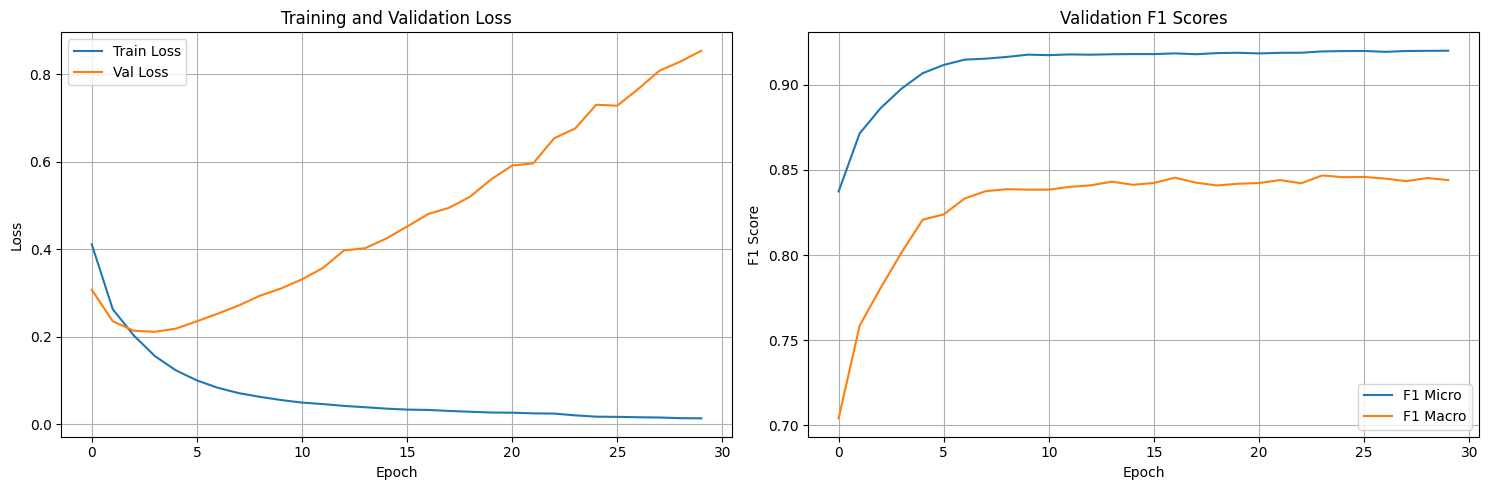

<All keys matched successfully>

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau, LambdaLR
import os

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

class EarlyStopping:
    def __init__(self, patience=5, mode='max'):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.mode = mode

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif (self.mode == 'max' and score <= self.best_score) or (self.mode == 'min' and score >= self.best_score):
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
def plot_training_metrics(metrics):
    plt.figure(figsize=(15, 5))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(metrics['f1_micro'], label='F1 Micro')
    plt.plot(metrics['f1_macro'], label='F1 Macro')
    plt.title('Validation F1 Scores')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
def plot_history(train_losses, val_f1s, metric='f1_micro'):
    fig, ax1 = plt.subplots()

    ax1.plot(train_losses, 'b-', label='Train Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='b')

    ax2 = ax1.twinx()
    ax2.plot(val_f1s, 'g-', label=f'Val {metric}')
    ax2.set_ylabel(f'{metric}', color='g')

    fig.tight_layout()
    plt.title("Training Loss & Validation Metric")
    plt.show()

os.makedirs("checkpoints", exist_ok=True)
model_path = "checkpoints/best_model.pt"


num_epochs = 30
warmup_epochs = 3
def warmup_lambda(epoch):
    return min(1.0, (epoch + 1) / warmup_epochs)

base_scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)
warmup_scheduler = LambdaLR(optimizer, lr_lambda=warmup_lambda)

early_stopping = EarlyStopping(patience=5, mode='max')

best_score = 0
metrics = {
    'train_loss': [],
    'val_loss': [],
    'f1_micro': [],
    'f1_macro': []
}
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    train_loss = train_epoch(model, train_loader)
    
    model.eval()
    val_losses = []
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_losses.append(val_loss.item())
            all_preds.extend((outputs.cpu().numpy() > 0.15).astype(int))
            all_labels.extend(labels.cpu().numpy())

    val_loss_mean = np.mean(val_losses)
    f1_micro = f1_score(all_labels, all_preds, average='micro')
    f1_macro = f1_score(all_labels, all_preds, average='macro')

    metrics['train_loss'].append(train_loss)
    metrics['val_loss'].append(val_loss_mean)
    metrics['f1_micro'].append(f1_micro)
    metrics['f1_macro'].append(f1_macro)
    f1_micro, f1_macro = eval_epoch(model, val_loader, threshold=0.15)

    print(f"Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

    if epoch < warmup_epochs:
        warmup_scheduler.step()
    else:
        base_scheduler.step(f1_micro)

    if f1_micro > best_score:
        best_score = f1_micro
        torch.save(model.state_dict(), model_path)
        print("Модель сохранена!")

    early_stopping(f1_micro)
    if early_stopping.early_stop:
        print("Ранняя остановка!")
        break

plot_training_metrics(metrics)

model.load_state_dict(torch.load(model_path))


In [34]:
model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
model.load_state_dict(torch.load("checkpoints/best_model.pt"))
model.to(device)
model.eval()
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.1).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_131.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 96.66it/s]


In [32]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


In [33]:
best_threshold = find_best_threshold(model, val_loader, device)

Best threshold: 0.10, F1: 0.8451


## W2V 

Попробуем на разных препроцессингах

Сначала на самом удасном на этот момент

In [35]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

In [36]:
from gensim.models import Word2Vec
import numpy as np

In [37]:
df = train_df
df['clean_text'] = df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

train_sentences = [text.split() for text in train_df['clean_text']]
test_sentences = [text.split() for text in test_df['clean_text']]

w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=300,  # размер эмбеддинга
    window=5,
    min_count=2,
    workers=4,
    sg=1,  # skip-gram
    epochs=10
)

In [38]:
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

In [39]:
X = np.array([get_average_vector(tokens, w2v_model, 300) for tokens in train_sentences])
X_test = np.array([get_average_vector(tokens, w2v_model, 300) for tokens in test_sentences])

y = np.array([list(map(int, x.split())) for x in df['labels']])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

import torch
from torch.utils.data import Dataset, DataLoader
class VectorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {
            'input': self.X[idx],
            'label': self.y[idx]
        }
train_dataset = VectorDataset(X_train, y_train)
val_dataset = VectorDataset(X_val, y_val)
test_dataset = VectorDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [40]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.0, path='best_model.pth'):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.path = path

    def step(self, val_loss, model):
        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(model)
        elif val_loss > self.best_score - self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} / {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)
        print(f"Saved best model to {self.path}")


Validation: 100%|██████████| 93/93 [00:00<00:00, 957.75it/s]


Saved best model to best_model.pth

Epoch 1/30:
Train Loss: 0.8995 | Val Loss: 0.7045
F1 Macro: 0.6876 | F1 Micro: 0.8467
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1011.06it/s]


EarlyStopping counter: 1 / 10

Epoch 2/30:
Train Loss: 0.5541 | Val Loss: 0.4732
F1 Macro: 0.7164 | F1 Micro: 0.8664
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 977.74it/s]


EarlyStopping counter: 1 / 10

Epoch 3/30:
Train Loss: 0.4411 | Val Loss: 0.4005
F1 Macro: 0.7418 | F1 Micro: 0.8818
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1007.43it/s]


EarlyStopping counter: 1 / 10

Epoch 4/30:
Train Loss: 0.3993 | Val Loss: 0.3657
F1 Macro: 0.7562 | F1 Micro: 0.8871
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 992.18it/s]


EarlyStopping counter: 1 / 10

Epoch 5/30:
Train Loss: 0.3793 | Val Loss: 0.3497
F1 Macro: 0.7644 | F1 Micro: 0.8923
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 992.00it/s]


EarlyStopping counter: 1 / 10

Epoch 6/30:
Train Loss: 0.3657 | Val Loss: 0.3388
F1 Macro: 0.7690 | F1 Micro: 0.8951
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1035.51it/s]


EarlyStopping counter: 1 / 10

Epoch 7/30:
Train Loss: 0.3558 | Val Loss: 0.3263
F1 Macro: 0.7729 | F1 Micro: 0.8990
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 957.55it/s]


EarlyStopping counter: 1 / 10

Epoch 8/30:
Train Loss: 0.3466 | Val Loss: 0.3204
F1 Macro: 0.7752 | F1 Micro: 0.9006
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1006.48it/s]


EarlyStopping counter: 1 / 10

Epoch 9/30:
Train Loss: 0.3423 | Val Loss: 0.3232
F1 Macro: 0.7765 | F1 Micro: 0.8999
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 986.99it/s]


EarlyStopping counter: 3 / 10

Epoch 10/30:
Train Loss: 0.3373 | Val Loss: 0.3152
F1 Macro: 0.7844 | F1 Micro: 0.9018
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1012.18it/s]


EarlyStopping counter: 1 / 10

Epoch 11/30:
Train Loss: 0.3320 | Val Loss: 0.3103
F1 Macro: 0.8037 | F1 Micro: 0.9044
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1005.24it/s]


EarlyStopping counter: 1 / 10

Epoch 12/30:
Train Loss: 0.3263 | Val Loss: 0.3050
F1 Macro: 0.8093 | F1 Micro: 0.9058
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 986.52it/s]


EarlyStopping counter: 1 / 10

Epoch 13/30:
Train Loss: 0.3244 | Val Loss: 0.3061
F1 Macro: 0.8088 | F1 Micro: 0.9042
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1010.95it/s]


EarlyStopping counter: 3 / 10

Epoch 14/30:
Train Loss: 0.3198 | Val Loss: 0.3012
F1 Macro: 0.8124 | F1 Micro: 0.9068
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1002.53it/s]


EarlyStopping counter: 1 / 10

Epoch 15/30:
Train Loss: 0.3169 | Val Loss: 0.3040
F1 Macro: 0.8118 | F1 Micro: 0.9055
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1023.98it/s]


EarlyStopping counter: 3 / 10

Epoch 16/30:
Train Loss: 0.3138 | Val Loss: 0.3000
F1 Macro: 0.8137 | F1 Micro: 0.9074
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 942.28it/s]


EarlyStopping counter: 1 / 10

Epoch 17/30:
Train Loss: 0.3123 | Val Loss: 0.3047
F1 Macro: 0.8103 | F1 Micro: 0.9037
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1011.77it/s]


EarlyStopping counter: 3 / 10

Epoch 18/30:
Train Loss: 0.3096 | Val Loss: 0.3002
F1 Macro: 0.8127 | F1 Micro: 0.9063
EarlyStopping counter: 4 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 988.63it/s]


EarlyStopping counter: 5 / 10

Epoch 19/30:
Train Loss: 0.3066 | Val Loss: 0.2935
F1 Macro: 0.8158 | F1 Micro: 0.9096
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 981.74it/s]


EarlyStopping counter: 1 / 10

Epoch 20/30:
Train Loss: 0.3043 | Val Loss: 0.3012
F1 Macro: 0.8117 | F1 Micro: 0.9064
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 988.53it/s]


EarlyStopping counter: 3 / 10

Epoch 21/30:
Train Loss: 0.3025 | Val Loss: 0.2897
F1 Macro: 0.8167 | F1 Micro: 0.9112
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1000.78it/s]


EarlyStopping counter: 1 / 10

Epoch 22/30:
Train Loss: 0.3014 | Val Loss: 0.2949
F1 Macro: 0.8157 | F1 Micro: 0.9087
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1001.87it/s]


EarlyStopping counter: 3 / 10

Epoch 23/30:
Train Loss: 0.2993 | Val Loss: 0.2906
F1 Macro: 0.8141 | F1 Micro: 0.9095
EarlyStopping counter: 4 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1012.99it/s]


EarlyStopping counter: 5 / 10

Epoch 24/30:
Train Loss: 0.2981 | Val Loss: 0.2920
F1 Macro: 0.8179 | F1 Micro: 0.9102
EarlyStopping counter: 6 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 997.68it/s]


EarlyStopping counter: 7 / 10

Epoch 25/30:
Train Loss: 0.2952 | Val Loss: 0.2863
F1 Macro: 0.8193 | F1 Micro: 0.9128
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1012.73it/s]


EarlyStopping counter: 1 / 10

Epoch 26/30:
Train Loss: 0.2938 | Val Loss: 0.2894
F1 Macro: 0.8182 | F1 Micro: 0.9105
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1013.41it/s]


EarlyStopping counter: 3 / 10

Epoch 27/30:
Train Loss: 0.2920 | Val Loss: 0.2849
F1 Macro: 0.8192 | F1 Micro: 0.9125
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 996.48it/s]


EarlyStopping counter: 1 / 10

Epoch 28/30:
Train Loss: 0.2906 | Val Loss: 0.2903
F1 Macro: 0.8205 | F1 Micro: 0.9117
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 1013.81it/s]


EarlyStopping counter: 3 / 10

Epoch 29/30:
Train Loss: 0.2895 | Val Loss: 0.2837
F1 Macro: 0.8215 | F1 Micro: 0.9129
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 982.74it/s]


EarlyStopping counter: 1 / 10

Epoch 30/30:
Train Loss: 0.2882 | Val Loss: 0.2826
F1 Macro: 0.8231 | F1 Micro: 0.9144
Saved best model to best_model.pth


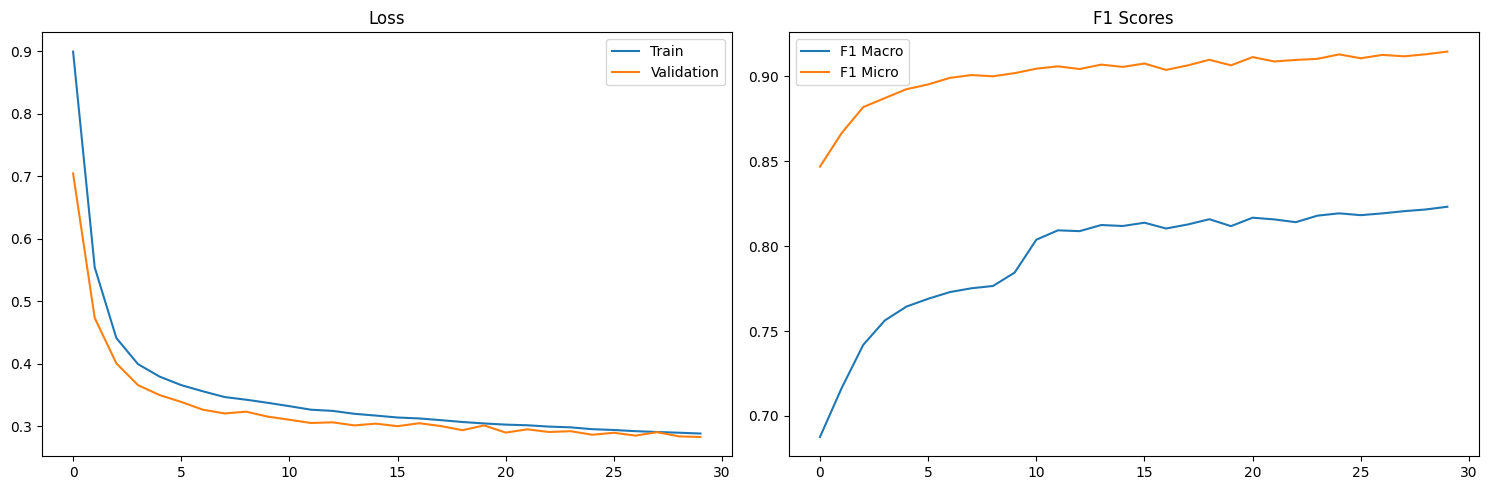

<All keys matched successfully>

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LinearLR
from torch.cuda import amp
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

class W2VMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

def eval_epoch(model, loader, criterion, device, threshold=0.5):
    model.eval()
    val_losses = []
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(loader, desc='Validation'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())

            probas = torch.sigmoid(outputs)
            preds.extend((probas.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())

    return {
        'f1_micro': f1_score(true_labels, preds, average='micro'),
        'f1_macro': f1_score(true_labels, preds, average='macro'),
        'loss': np.mean(val_losses)
    }

def train_epoch(model, loader, criterion, optimizer, scheduler, scaler, device):
    model.train()
    losses = []

    for batch in tqdm(loader, desc='Training'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        losses.append(loss.item())

    return np.mean(losses)

def plot_training_history(history):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_f1_macro'], label='F1 Macro')
    plt.plot(history['val_f1_micro'], label='F1 Micro')
    plt.title('F1 Scores')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = W2VMLP(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)

pos_weight = torch.tensor([2.0]).to(device)  
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.01)


total_epochs = 30
warmup_epochs = 5

scheduler = LinearLR(
    optimizer, 
    start_factor=0.01,
    end_factor=1.0,
    total_iters=warmup_epochs * len(train_loader)
)

scaler = amp.GradScaler()

history = {
    'train_loss': [],
    'val_loss': [],
    'val_f1_micro': [],
    'val_f1_macro': []
}

best_f1 = 0
early_stopping = EarlyStopping(patience=10, path='best_model.pth')


for epoch in range(total_epochs):
    # Обучение
    train_loss = train_epoch(
        model, train_loader, criterion, 
        optimizer, scheduler, scaler, device
    )
    history['train_loss'].append(train_loss)

    val_metrics = eval_epoch(model, val_loader, criterion, device)
    history['val_loss'].append(val_metrics['loss'])
    history['val_f1_macro'].append(val_metrics['f1_macro'])
    history['val_f1_micro'].append(val_metrics['f1_micro'])
    early_stopping.step(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        model.load_state_dict(torch.load('best_model.pth'))
        break

    # Вывод метрик
    print(f"\nEpoch {epoch+1}/{total_epochs}:")
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_metrics['loss']:.4f}")
    print(f"F1 Macro: {val_metrics['f1_macro']:.4f} | F1 Micro: {val_metrics['f1_micro']:.4f}")

    early_stopping.step(val_metrics['loss'], model)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

plot_training_history(history)
checkpoint = torch.load('best_model.pth')
model.load_state_dict(torch.load('best_model.pth'))


Попробуем другой препроцессинг

In [42]:
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+', ' ', text)
    text = re.sub(r'[^\w\s.,!?а-яё]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return tokens

In [43]:
df = train_df

df['clean_text'] = df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

train_sentences = df['clean_text'].tolist()  # Уже списки слов
test_sentences = test_df['clean_text'].tolist()

In [44]:
w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=300,  # размер эмбеддинга
    window=5,
    min_count=2,
    workers=4,
    sg=1,  # skip-gram
    epochs=10
)

In [45]:
X = np.array([get_average_vector(tokens, w2v_model, 300) for tokens in train_sentences])
X_test = np.array([get_average_vector(tokens, w2v_model, 300) for tokens in test_sentences])

y = np.array([list(map(int, x.split())) for x in df['labels']])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

import torch
from torch.utils.data import Dataset, DataLoader
class VectorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {
            'input': self.X[idx],
            'label': self.y[idx]
        }
train_dataset = VectorDataset(X_train, y_train)
val_dataset = VectorDataset(X_val, y_val)
test_dataset = VectorDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

Validation: 100%|██████████| 93/93 [00:00<00:00, 996.36it/s]


Saved best model to best_model.pth

Epoch 1/30:
Train Loss: 0.9082 | Val Loss: 0.7015
F1 Macro: 0.7109 | F1 Micro: 0.8528
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 994.19it/s]


EarlyStopping counter: 1 / 10

Epoch 2/30:
Train Loss: 0.5398 | Val Loss: 0.4497
F1 Macro: 0.7259 | F1 Micro: 0.8761
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 989.19it/s]


EarlyStopping counter: 1 / 10

Epoch 3/30:
Train Loss: 0.4194 | Val Loss: 0.3728
F1 Macro: 0.7427 | F1 Micro: 0.8884
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1005.52it/s]


EarlyStopping counter: 1 / 10

Epoch 4/30:
Train Loss: 0.3790 | Val Loss: 0.3428
F1 Macro: 0.7608 | F1 Micro: 0.8960
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 998.79it/s]


EarlyStopping counter: 1 / 10

Epoch 5/30:
Train Loss: 0.3575 | Val Loss: 0.3218
F1 Macro: 0.7710 | F1 Micro: 0.9017
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1011.44it/s]


EarlyStopping counter: 1 / 10

Epoch 6/30:
Train Loss: 0.3451 | Val Loss: 0.3131
F1 Macro: 0.7745 | F1 Micro: 0.9043
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 964.42it/s]


EarlyStopping counter: 1 / 10

Epoch 7/30:
Train Loss: 0.3349 | Val Loss: 0.3070
F1 Macro: 0.7769 | F1 Micro: 0.9053
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 966.49it/s]


EarlyStopping counter: 1 / 10

Epoch 8/30:
Train Loss: 0.3269 | Val Loss: 0.2978
F1 Macro: 0.7844 | F1 Micro: 0.9093
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 998.96it/s]


EarlyStopping counter: 1 / 10

Epoch 9/30:
Train Loss: 0.3198 | Val Loss: 0.2899
F1 Macro: 0.8045 | F1 Micro: 0.9099
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 963.67it/s]


EarlyStopping counter: 1 / 10

Epoch 10/30:
Train Loss: 0.3171 | Val Loss: 0.2911
F1 Macro: 0.8045 | F1 Micro: 0.9118
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 973.86it/s]


EarlyStopping counter: 3 / 10

Epoch 11/30:
Train Loss: 0.3117 | Val Loss: 0.2893
F1 Macro: 0.8008 | F1 Micro: 0.9102
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 968.00it/s]


EarlyStopping counter: 1 / 10

Epoch 12/30:
Train Loss: 0.3086 | Val Loss: 0.2827
F1 Macro: 0.8104 | F1 Micro: 0.9152
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 980.02it/s]


EarlyStopping counter: 1 / 10

Epoch 13/30:
Train Loss: 0.3039 | Val Loss: 0.2812
F1 Macro: 0.8090 | F1 Micro: 0.9132
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 969.08it/s]


EarlyStopping counter: 1 / 10

Epoch 14/30:
Train Loss: 0.3016 | Val Loss: 0.2794
F1 Macro: 0.8126 | F1 Micro: 0.9155
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 987.49it/s]


EarlyStopping counter: 1 / 10

Epoch 15/30:
Train Loss: 0.2986 | Val Loss: 0.2774
F1 Macro: 0.8175 | F1 Micro: 0.9142
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 971.24it/s]


EarlyStopping counter: 1 / 10

Epoch 16/30:
Train Loss: 0.2970 | Val Loss: 0.2743
F1 Macro: 0.8145 | F1 Micro: 0.9150
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 956.28it/s]


EarlyStopping counter: 1 / 10

Epoch 17/30:
Train Loss: 0.2936 | Val Loss: 0.2746
F1 Macro: 0.8165 | F1 Micro: 0.9151
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 974.29it/s]


EarlyStopping counter: 3 / 10

Epoch 18/30:
Train Loss: 0.2916 | Val Loss: 0.2735
F1 Macro: 0.8187 | F1 Micro: 0.9160
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 971.66it/s]


EarlyStopping counter: 1 / 10

Epoch 19/30:
Train Loss: 0.2879 | Val Loss: 0.2727
F1 Macro: 0.8197 | F1 Micro: 0.9155
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 957.18it/s]


EarlyStopping counter: 1 / 10

Epoch 20/30:
Train Loss: 0.2866 | Val Loss: 0.2725
F1 Macro: 0.8210 | F1 Micro: 0.9165
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 973.46it/s]


EarlyStopping counter: 1 / 10

Epoch 21/30:
Train Loss: 0.2853 | Val Loss: 0.2724
F1 Macro: 0.8222 | F1 Micro: 0.9188
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 1006.56it/s]


EarlyStopping counter: 1 / 10

Epoch 22/30:
Train Loss: 0.2838 | Val Loss: 0.2679
F1 Macro: 0.8264 | F1 Micro: 0.9179
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 962.52it/s]


EarlyStopping counter: 1 / 10

Epoch 23/30:
Train Loss: 0.2812 | Val Loss: 0.2673
F1 Macro: 0.8216 | F1 Micro: 0.9177
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 952.80it/s]


EarlyStopping counter: 1 / 10

Epoch 24/30:
Train Loss: 0.2785 | Val Loss: 0.2662
F1 Macro: 0.8288 | F1 Micro: 0.9195
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 957.22it/s]


EarlyStopping counter: 1 / 10

Epoch 25/30:
Train Loss: 0.2764 | Val Loss: 0.2643
F1 Macro: 0.8240 | F1 Micro: 0.9200
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 979.82it/s]


EarlyStopping counter: 1 / 10

Epoch 26/30:
Train Loss: 0.2751 | Val Loss: 0.2646
F1 Macro: 0.8295 | F1 Micro: 0.9203
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 957.02it/s]


EarlyStopping counter: 3 / 10

Epoch 27/30:
Train Loss: 0.2753 | Val Loss: 0.2631
F1 Macro: 0.8282 | F1 Micro: 0.9197
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 966.66it/s]


EarlyStopping counter: 1 / 10

Epoch 28/30:
Train Loss: 0.2737 | Val Loss: 0.2727
F1 Macro: 0.8317 | F1 Micro: 0.9163
EarlyStopping counter: 2 / 10


Validation: 100%|██████████| 93/93 [00:00<00:00, 968.11it/s]


EarlyStopping counter: 3 / 10

Epoch 29/30:
Train Loss: 0.2717 | Val Loss: 0.2629
F1 Macro: 0.8337 | F1 Micro: 0.9192
Saved best model to best_model.pth


Validation: 100%|██████████| 93/93 [00:00<00:00, 990.28it/s]


EarlyStopping counter: 1 / 10

Epoch 30/30:
Train Loss: 0.2702 | Val Loss: 0.2628
F1 Macro: 0.8320 | F1 Micro: 0.9187
Saved best model to best_model.pth


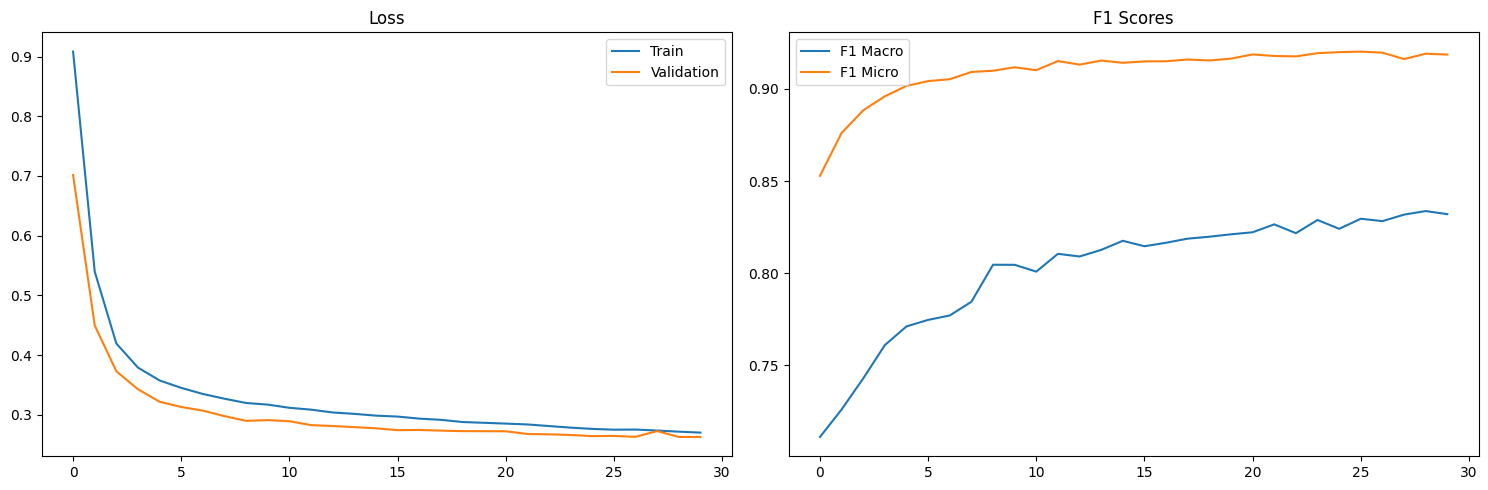

<All keys matched successfully>

In [46]:
class W2VMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

def eval_epoch(model, loader, criterion, device, threshold=0.5):
    model.eval()
    val_losses = []
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(loader, desc='Validation'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_losses.append(loss.item())

            probas = torch.sigmoid(outputs)
            preds.extend((probas.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())

    return {
        'f1_micro': f1_score(true_labels, preds, average='micro'),
        'f1_macro': f1_score(true_labels, preds, average='macro'),
        'loss': np.mean(val_losses)
    }

def train_epoch(model, loader, criterion, optimizer, scheduler, scaler, device):
    model.train()
    losses = []

    for batch in tqdm(loader, desc='Training'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        losses.append(loss.item())

    return np.mean(losses)

def plot_training_history(history):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_f1_macro'], label='F1 Macro')
    plt.plot(history['val_f1_micro'], label='F1 Micro')
    plt.title('F1 Scores')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = W2VMLP(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)

pos_weight = torch.tensor([2.0]).to(device)  
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.01)


total_epochs = 30
warmup_epochs = 5

scheduler = LinearLR(
    optimizer, 
    start_factor=0.01,
    end_factor=1.0,
    total_iters=warmup_epochs * len(train_loader)
)

scaler = amp.GradScaler()

history = {
    'train_loss': [],
    'val_loss': [],
    'val_f1_micro': [],
    'val_f1_macro': []
}

best_f1 = 0
early_stopping = EarlyStopping(patience=10, path='best_model.pth')


for epoch in range(total_epochs):
    # Обучение
    train_loss = train_epoch(
        model, train_loader, criterion, 
        optimizer, scheduler, scaler, device
    )
    history['train_loss'].append(train_loss)

    val_metrics = eval_epoch(model, val_loader, criterion, device)
    history['val_loss'].append(val_metrics['loss'])
    history['val_f1_macro'].append(val_metrics['f1_macro'])
    history['val_f1_micro'].append(val_metrics['f1_micro'])
    early_stopping.step(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        model.load_state_dict(torch.load('best_model.pth'))
        break

    # Вывод метрик
    print(f"\nEpoch {epoch+1}/{total_epochs}:")
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_metrics['loss']:.4f}")
    print(f"F1 Macro: {val_metrics['f1_macro']:.4f} | F1 Micro: {val_metrics['f1_micro']:.4f}")

    early_stopping.step(val_metrics['loss'], model)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

plot_training_history(history)
checkpoint = torch.load('best_model.pth')
model.load_state_dict(torch.load('best_model.pth'))

# Генератор?

In [4]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel


/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-05-17 08:55:12.662537: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 08:55:16.070306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-17 08:55:25.127752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# model_name = 'sberbank-ai/rugpt2large'
# tokenizer = GPT2Tokenizer.from_pretrained(model_name)
# model = GPT2LMHeadModel.from_pretrained(model_name).cuda()

In [7]:
df = train_df
labels = df["labels"].str.split(" ", expand=True).astype(int)
label_distribution = labels.mean(axis=0)

In [8]:
import logging

# Настройка логгирования
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [14]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm

In [15]:
class TextGenerator:
    def __init__(self, model_name='sberbank-ai/rugpt2large'):
        """Инициализация генератора текста"""
        self.model_name = model_name
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self._load_model()
        
    def _load_model(self):
        """Загрузка модели с обработкой ошибок"""
        try:
            logger.info(f"Загрузка модели {self.model_name} на {self.device}...")
            self.tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
            self.model = GPT2LMHeadModel.from_pretrained(self.model_name).to(self.device)
            
            # Оптимизация для GPU
            if self.device.type == 'cuda':
                self.model = self.model.half()  # Используем половинную точность
                torch.cuda.empty_cache()
                
            logger.info("Модель успешно загружена!")
        except Exception as e:
            logger.error(f"Ошибка загрузки модели: {e}")
            raise

    def create_prompt(self, labels):
        """Создание промпта по бинарным меткам"""
        labels_str = " ".join(map(str, labels))
        return (
            "Сгенерируй текст анонса мероприятия с такими характеристиками:\n"
            f"Метки: {labels_str}\n"
            "Текст анонса: "
        )

    def generate_text(self, labels, max_length=100):
        """Генерация текста по меткам"""
        try:
            prompt = self.create_prompt(labels)
            input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)
            
            output = self.model.generate(
                input_ids,
                max_length=max_length + len(input_ids[0]),  # Учитываем длину промпта
                temperature=0.8,
                top_k=40,
                top_p=0.95,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id,
                eos_token_id=self.tokenizer.eos_token_id
            )
            
            generated_text = self.tokenizer.decode(output[0], skip_special_tokens=True)
            return generated_text[len(prompt):].strip()
            
        except Exception as e:
            logger.warning(f"Ошибка генерации: {e}")
            return None



In [16]:
def generate_synthetic_data(original_csv, num_samples=1000, output_csv="synthetic_data.csv"):
    """Генерация синтетических данных"""
    try:
        # 1. Инициализация генератора
        generator = TextGenerator()
        
        # 2. Загрузка и анализ исходных данных
        logger.info("Загрузка исходного датасета...")
        df = train_df
        labels = df["labels"].str.split(" ", expand=True).astype(int)
        label_distribution = labels.mean(axis=0)
        
        # 3. Генерация данных
        synthetic_data = []
        progress_bar = tqdm(range(num_samples), desc="Генерация текстов")
        
        for _ in progress_bar:
            random_labels = np.random.binomial(1, label_distribution).tolist()
            text = generator.generate_text(random_labels)
            
            if text:  # Если генерация успешна
                synthetic_data.append({
                    "text": text,
                    "labels": " ".join(map(str, random_labels))
                })
        
        # 4. Сохранение результатов
        result_df = pd.DataFrame(synthetic_data)
        result_df.to_csv(output_csv, index=False)
        logger.info(f"Успешно сгенерировано {len(result_df)} примеров. Результаты сохранены в {output_csv}")
        
        return result_df
        
    except Exception as e:
        logger.error(f"Критическая ошибка: {e}")
        return None

if __name__ == "__main__":
    # Пример использования
    generate_synthetic_data(
        original_csv="your_dataset.csv",
        num_samples=1000,
        output_csv="synthetic_data.csv"
    )

INFO:__main__:Загрузка модели sberbank-ai/rugpt2large на cuda...
INFO:__main__:Модель успешно загружена!
INFO:__main__:Загрузка исходного датасета...
Генерация текстов: 100%|██████████| 1000/1000 [34:01<00:00,  2.04s/it]
INFO:__main__:Успешно сгенерировано 997 примеров. Результаты сохранены в synthetic_data.csv


In [18]:
synthetic_df = pd.read_csv("synthetic_data.csv")
print(synthetic_df.sample(5))

                                                  text                                   labels
163  Внимание!  Творческая часть мероприятия.  Веду...  1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1
89   _____________________________.\n\n3. _________...  0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1
904  _____ (рис. 1).\n\n\n\n\n\n\nРис. 1. Текст ано...  0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0
423  ...,.............................................  0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0
26   1 1 1 1 1 1 1\n\n\n\nКодовые слова для запуска...  1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0


In [21]:
synthetic_df.iloc[0]

text      (1) «Я, Владимир Путин, Президент России, приг...
labels              1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
Name: 0, dtype: object

In [35]:
print(synthetic_df.loc[0, 'text'])

(1) «Я, Владимир Путин, Президент России, приглашаю вас на свое очередное мероприятие - презентацию книги «От первого лица».
(2) В ходе презентации я хочу представить вам, дорогие друзья, свои творческие произведения. В конце презентации я буду давать вам советы по поводу того, как можно улучшить или улучшить свои тексты.
(3) Книга «От первого лица» - это, безусловно, мой вклад в развитие и становление современной демократии. Я надеюсь, что все,


In [37]:
original_labels = df["labels"].str.split(" ", expand=True).astype(int)
print("Оригинальное распределение:\n", original_labels.mean(axis=0))

# Для синтетических данных
synthetic_labels = synthetic_df["labels"].str.split(" ", expand=True).astype(int)
print("\nСинтетическое распределение:\n", synthetic_labels.mean(axis=0))

Оригинальное распределение:
 0     0.542252
1     0.648612
2     0.050120
3     0.060210
4     0.614410
5     0.003533
6     0.007139
7     0.771399
8     0.784622
9     0.698405
10    0.431740
11    0.628542
12    0.791615
13    0.777555
14    0.761528
15    0.500947
16    0.739237
17    0.800284
18    0.824980
19    0.191593
dtype: float64

Синтетическое распределение:
 0     0.567703
1     0.657974
2     0.051153
3     0.064193
4     0.610832
5     0.005015
6     0.009027
7     0.781344
8     0.803410
9     0.675025
10    0.429288
11    0.638917
12    0.797392
13    0.789368
14    0.765296
15    0.503511
16    0.751254
17    0.801404
18    0.810431
19    0.174524
dtype: float64


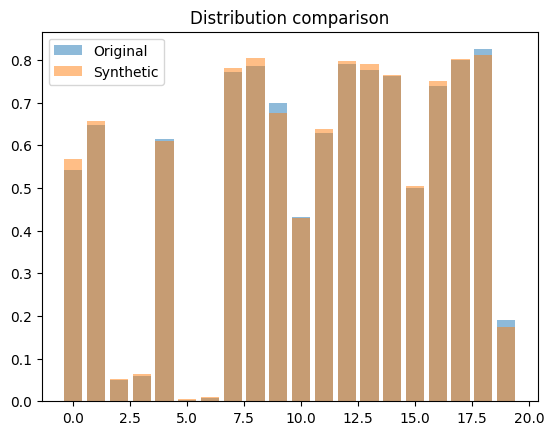

In [63]:

plt.bar(range(20), original_labels.mean(axis=0), alpha=0.5, label='Original')
plt.bar(range(20), synthetic_labels.mean(axis=0), alpha=0.5, label='Synthetic')
plt.legend()
plt.title("Distribution comparison")
plt.show()

In [47]:
synthetic_df = synthetic_df.drop_duplicates(subset=['text'], keep='first')

In [49]:
synthetic_df_clean = synthetic_df[synthetic_df["text"].str.len() > 20]

In [48]:
print(f"Найдено {synthetic_df.duplicated(subset=['text']).sum()} дубликатов текстов")

Найдено 0 дубликатов текстов


In [51]:
final_df = pd.concat([df, synthetic_df_clean], ignore_index=True)
final_df.to_csv("augmented_dataset.csv", index=False)

In [52]:
import re

def preprocess_text(text):
    text = text.lower()

    # Удаляем ссылки, хэштеги, спецсимволы, эмодзи, управляющие символы
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)  # Убираем всё кроме кириллицы, цифр и подчеркивания
    text = re.sub(r'\s+', ' ', text).strip()

    # Токенизация и стемминг
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)


In [64]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\sа-яё0-9:]', ' ', text)
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and (len(token) > 2 or token.isdigit())]
    return ' '.join(tokens)

In [55]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

In [73]:
final_df['clean_text'] = final_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(final_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

# Цели (multi-label)
y = np.array([list(map(int, x.split())) for x in final_df['labels']])

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


In [75]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TfidfMLP(
  (model): Sequential(
    (0): Linear(in_features=30000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=20, bias=True)
    (7): Sigmoid()
  )
)

In [76]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.5):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

In [77]:
for epoch in range(30):
    train_loss = train_epoch(model, train_loader)
    f1_micro, f1_macro = eval_epoch(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

Val: 100%|██████████| 89/89 [00:00<00:00, 102.06it/s]


Epoch 1: Loss=0.3591, F1_micro=0.8915, F1_macro=0.7322


Val: 100%|██████████| 89/89 [00:00<00:00, 103.65it/s]


Epoch 2: Loss=0.2342, F1_micro=0.9062, F1_macro=0.7727


Val: 100%|██████████| 89/89 [00:00<00:00, 103.92it/s]


Epoch 3: Loss=0.1813, F1_micro=0.9101, F1_macro=0.7866


Val: 100%|██████████| 89/89 [00:00<00:00, 103.40it/s]


Epoch 4: Loss=0.1461, F1_micro=0.9111, F1_macro=0.7969


Val: 100%|██████████| 89/89 [00:00<00:00, 105.38it/s]


Epoch 5: Loss=0.1193, F1_micro=0.9098, F1_macro=0.7979


Val: 100%|██████████| 89/89 [00:00<00:00, 103.30it/s]


Epoch 6: Loss=0.0997, F1_micro=0.9100, F1_macro=0.8049


Val: 100%|██████████| 89/89 [00:00<00:00, 103.37it/s]


Epoch 7: Loss=0.0848, F1_micro=0.9089, F1_macro=0.8024


Val: 100%|██████████| 89/89 [00:00<00:00, 104.34it/s]


Epoch 8: Loss=0.0735, F1_micro=0.9095, F1_macro=0.8059


Val: 100%|██████████| 89/89 [00:00<00:00, 104.93it/s]


Epoch 9: Loss=0.0650, F1_micro=0.9087, F1_macro=0.8073


Val: 100%|██████████| 89/89 [00:00<00:00, 104.20it/s]


Epoch 10: Loss=0.0580, F1_micro=0.9088, F1_macro=0.8073


Val: 100%|██████████| 89/89 [00:00<00:00, 106.76it/s]


Epoch 11: Loss=0.0523, F1_micro=0.9082, F1_macro=0.8057


Val: 100%|██████████| 89/89 [00:00<00:00, 105.22it/s]


Epoch 12: Loss=0.0485, F1_micro=0.9088, F1_macro=0.8083


Val: 100%|██████████| 89/89 [00:00<00:00, 103.57it/s]


Epoch 13: Loss=0.0448, F1_micro=0.9087, F1_macro=0.8043


Val: 100%|██████████| 89/89 [00:00<00:00, 104.81it/s]


Epoch 14: Loss=0.0417, F1_micro=0.9083, F1_macro=0.8060


Val: 100%|██████████| 89/89 [00:00<00:00, 103.60it/s]


Epoch 15: Loss=0.0391, F1_micro=0.9086, F1_macro=0.8103


Val: 100%|██████████| 89/89 [00:00<00:00, 107.36it/s]


Epoch 16: Loss=0.0374, F1_micro=0.9076, F1_macro=0.8079


Val: 100%|██████████| 89/89 [00:00<00:00, 102.96it/s]


Epoch 17: Loss=0.0347, F1_micro=0.9083, F1_macro=0.8088


Val: 100%|██████████| 89/89 [00:00<00:00, 104.88it/s]


Epoch 18: Loss=0.0331, F1_micro=0.9074, F1_macro=0.8092


Val: 100%|██████████| 89/89 [00:00<00:00, 102.77it/s]


Epoch 19: Loss=0.0316, F1_micro=0.9068, F1_macro=0.8082


Val: 100%|██████████| 89/89 [00:00<00:00, 106.03it/s]


Epoch 20: Loss=0.0302, F1_micro=0.9085, F1_macro=0.8084


Val: 100%|██████████| 89/89 [00:00<00:00, 102.86it/s]


Epoch 21: Loss=0.0296, F1_micro=0.9070, F1_macro=0.8063


Val: 100%|██████████| 89/89 [00:00<00:00, 105.21it/s]


Epoch 22: Loss=0.0277, F1_micro=0.9075, F1_macro=0.8096


Val: 100%|██████████| 89/89 [00:00<00:00, 102.10it/s]


Epoch 23: Loss=0.0269, F1_micro=0.9071, F1_macro=0.8076


Val: 100%|██████████| 89/89 [00:00<00:00, 102.51it/s]


Epoch 24: Loss=0.0255, F1_micro=0.9085, F1_macro=0.8109


Val: 100%|██████████| 89/89 [00:00<00:00, 103.64it/s]


Epoch 25: Loss=0.0253, F1_micro=0.9072, F1_macro=0.8080


Val: 100%|██████████| 89/89 [00:00<00:00, 101.13it/s]


Epoch 26: Loss=0.0241, F1_micro=0.9079, F1_macro=0.8084


Val: 100%|██████████| 89/89 [00:00<00:00, 103.82it/s]


Epoch 27: Loss=0.0240, F1_micro=0.9079, F1_macro=0.8104


Val: 100%|██████████| 89/89 [00:00<00:00, 101.17it/s]


Epoch 28: Loss=0.0231, F1_micro=0.9068, F1_macro=0.8083


Val: 100%|██████████| 89/89 [00:00<00:00, 102.24it/s]


Epoch 29: Loss=0.0225, F1_micro=0.9077, F1_macro=0.8148


Val: 100%|██████████| 89/89 [00:00<00:00, 103.08it/s]

Epoch 30: Loss=0.0211, F1_micro=0.9070, F1_macro=0.8106


In [78]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


In [79]:
best_threshold = find_best_threshold(model, val_loader, device)

Best threshold: 0.20, F1: 0.8124


 качество упало, попробуем чтот то ещё намутить

In [48]:
%pip uninstall -y transformers torch
%pip install torch==2.0.1 transformers==4.29.2 --no-cache-dir --force-reinstall

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3.10/shutil.py", line 816, in move
    os.rename(src, real_dst)
PermissionError: [Errno 13] Permission denied: '/usr/local/bin/convert-caffe2-to-onnx' -> '/tmp/pip-uninstall-qly226ty/convert-caffe2-to-onnx'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/kernel/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/kernel/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/kernel/lib/python3.10/site-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/kernel/lib/python3.10/site-packages/pip/_internal/req/req_install.py", line 723, in uninstall
    uninstalled_pat

In [50]:
pip install transformers torch sentencepiece tqdm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
# model_name='sberbank-ai/rugpt2large'
class TextGenerator:
    def __init__(self, model_name = "ai-forever/rugpt3small_based_on_gpt2"):
        self.model_name = model_name
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self._load_model()
        
    def _load_model(self):
        try:
            logger.info(f"Загрузка модели {self.model_name} на {self.device}...")
            self.tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
            self.model = GPT2LMHeadModel.from_pretrained(self.model_name).to(self.device)

            if self.device.type == 'cuda':
                self.model = self.model.half()
                torch.cuda.empty_cache()
            logger.info("Модель успешно загружена!")
        except Exception as e:
            logger.error(f"Ошибка загрузки модели: {e}")
            raise

    def create_prompt(self, target_labels, reference_data=None, n_refs=2):
        prompt = "Ты — генератор креативных анонсов мероприятий. Примеры:\n\n"
        
        if reference_data is not None:
            examples = reference_data.sample(n=min(n_refs, len(reference_data)))
            for _, row in examples.iterrows():
                labels_str = row['labels'] if isinstance(row['labels'], str) else " ".join(map(str, row['labels']))
                text = row['text'].strip().replace("\n", " ")
                prompt += f"Метки: {labels_str}\n"
                prompt += f"Описание мероприятия: {text}\n\n"
        
        target_label_str = " ".join(map(str, target_labels))
        prompt += f"Метки: {target_label_str}\nОписание мероприятия: "
        return prompt

    def generate_text(self, labels, reference_data=None, max_length=150):
        try:
            prompt = self.create_prompt(labels, reference_data=reference_data)
            input_ids = self.tokenizer.encode(prompt, return_tensors='pt').to(self.device)

            output = self.model.generate(
                input_ids,
                max_length=max_length + input_ids.shape[1],
                temperature=0.8,
                top_k=40,
                top_p=0.95,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id,
                eos_token_id=self.tokenizer.eos_token_id
            )

            generated_text = self.tokenizer.decode(output[0], skip_special_tokens=True)
            return generated_text[len(prompt):].strip()

        except Exception as e:
            logger.warning(f"Ошибка генерации: {e}")
            return None

def clean_reference_data(df):
    def is_valid_text(text):
        if not isinstance(text, str):
            return False
        text_l = text.lower()
        return (
            "текст анонса" not in text_l and
            "анонс мероприятия" not in text_l and
            len(text_l.split()) > 5 and
            len(set(text_l.split())) > 5 and
            len(text_l) > 50
        )
    
    return df[df["text"].apply(is_valid_text)].copy()

def generate_synthetic_data(train_df, num_samples=1000, output_csv="synthetic_data.csv"):
    try:
        generator = TextGenerator()
        logger.info("Фильтрация референсных данных...")
        clean_df = clean_reference_data(train_df)

        label_df = train_df["labels"].str.split(" ", expand=True).astype(int)
        label_distribution = label_df.mean(axis=0).values

        synthetic_data = []
        pbar = tqdm(range(num_samples), desc="Генерация текстов")

        for _ in pbar:
            random_labels = np.random.binomial(1, label_distribution).tolist()
            text = generator.generate_text(random_labels, reference_data=clean_df, max_length=150)

            if text:
                synthetic_data.append({
                    "text": text,
                    "labels": " ".join(map(str, random_labels))
                })

        result_df = pd.DataFrame(synthetic_data)
        result_df.to_csv(output_csv, index=False)
        logger.info(f"Сгенерировано {len(result_df)} примеров. Сохранено в {output_csv}")
        return result_df

    except Exception as e:
        logger.error(f"Критическая ошибка генерации: {e}")
        return None


In [8]:
synthetic_df = generate_synthetic_data(train_df, num_samples=500)

INFO:__main__:Загрузка модели ai-forever/rugpt3small_based_on_gpt2 на cuda...
/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO:__main__:Модель успешно загружена!
INFO:__main__:Фильтрация референсных данных...
Генерация текстов: 100%|██████████| 500/500 [11:56<00:00,  1.43s/it]
INFO:__main__:Сгенерировано 500 примеров. Сохранено в synthetic_data.csv


In [9]:
synthetic_data = pd.read_csv('synthetic_data.csv')
synthetic_data

,text,labels
0,🥦 Классика русской культуры 🤔 В программе: Гри...,0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
1,🔥 Театр на Серпуховке 👉 Концерт «Гитара для ко...,0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
2,🍦 Театр «Планета пиццы» (г.Москва) 🍦 «Зимняя с...,1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1
3,🔥 69% СКИДКА НА БИЛЕТЫ по промокоду СТУДЕНТ\n\...,1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
4,🌍🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃...,0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
...,...,...
495,0 0 1 1 0 1 0 1 1 1 1 0 1\nОписание мероприяти...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
496,🌻 💰 билеты со скидками @molokosovcat 🎭 в честь...,1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
497,🌎 🔴 Подписывайся на Афишу Ростова\n\nМетки: 0 ...,0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
498,Клубы Смена и Арма Музыкальный фестиваль «Выго...,1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1


In [10]:
print(synthetic_data.loc[300, 'text'])

📍 В рамках выставки «Открытые инновации», которая прошла в Пятигорске, прошла конференция: ✔ На базе бизнес-инкубатора «Открытие» и Бизнес-инкубатора «Школа инноваций» состоялась научно-практическая конференция: «Открытие» - 2015 - «Открытие» – 2016: инновации в бизнесе. Открытие и Бизнес-инкубатор «Школа инноваций» — 2015 год. В рамках мероприятия были организованы:👌 семинар по вопросам инноваций, инновационного развития бизнеса, инновационного менеджмента, инновационной деятельности и инновационной деятельности в малом бизнесе, а так же презентации инноваций, инноваций, инновационных идей и разработок для малого бизнеса. По итогам мероприятия, был


In [11]:
best = pd.read_csv('генератор.csv')
best

,text,labels
0,🎤 Вячеслав Антонов с программой «За глубинку» ...,1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1
1,"РАСНАЯ КОЛЛЕГА-БЫЛОВА», ""КРАСНЫЙ УРАЛЬСКИЙ ПЕХ...",1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
2,Любимый мультик «Багряный кардинал» — уже скор...,1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0
3,🔥 В рамках празднования Дней города на площади...,0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
4,Строительство станции «Достоевская» проходит в...,1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
...,...,...
495,📍 В музее кино работают творческие коллективы ...,1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0
496,Хореограф – Светлана КАРТАШИНА🍂 Хореограф – Ро...,1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0
497,Приглашаем в путешествие по старинной башкирск...,0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0
498,"🎫 Фикси-шоу – это интерактивная площадка, куда...",0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0


In [12]:
print(best.loc[3, 'text'])

🔥 В рамках празднования Дней города на площади возле городской ёлки в г.Минеральные Воды состоялась традиционная акция «Новогодние каникулы». На этот раз в программе были «Новогодний переполох», «Новогодняя ярмарка», «Новогодние каникулы», «Новогодняя ярмарка» и другие. 🎭 В рамках акции состоялась акция «Новогодние каникулы» и «Новогодняя ярмарка». На площади у городской ёлки в г.Минеральные Воды в преддверии праздника Нового Года и Рождества горожан ждал праздник под названием «Новогодняя ярмарка», где все желающие могли попробовать свои силы в различных видах творчества и получить подарки от Деда Мороза, Снегурочки и


Генератор справиляется лучше с меньшим количестом, давайте ещё сгенерим 500 штук и добавим всё вместе в тренировочный датасет

In [14]:
synthetic_df_1 = generate_synthetic_data(train_df, num_samples=600)

INFO:__main__:Загрузка модели ai-forever/rugpt3small_based_on_gpt2 на cuda...
/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO:__main__:Модель успешно загружена!
INFO:__main__:Фильтрация референсных данных...
Генерация текстов: 100%|██████████| 600/600 [14:16<00:00,  1.43s/it]
INFO:__main__:Сгенерировано 600 примеров. Сохранено в synthetic_data.csv


In [15]:
best_2 = pd.read_csv('synthetic_data.csv')
best_2

,text,labels
0,🎆 Открытая вечеринка в субботу 🎆 Открытая вече...,0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0
1,🌸 –30% на спектакль «Пигмалион» 🌸 💃 Комедия-мю...,0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0
2,"🌐Фильм о том, как с помощью рекламы можно прив...",0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1
3,"пектакль «Прикинь, что ты - Бог» (реж. А. Барг...",1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0
4,📌 Концертный зал «Хайре» 🎂 Большой зал «Кузьми...,1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0
...,...,...
595,"Музей Москвы, 1 корпус,\n\nМетки: 1 1 0 0 0 0 ...",1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0
596,🎵 Шоу-концерт в «Зимнем саду» в Сокольниках 📍 ...,1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
597,📡 В этот день вы сможете принять участие в одн...,1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
598,💰 #афиша_москвы #мероприятия #выставки #фестив...,0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0


In [17]:
print(best_2.loc[3, 'text'])

пектакль «Прикинь, что ты - Бог» (реж. А. Баргман) Вопросы о смысле жизни и уникальная сценография! 👉💦 Театр им. В. Ф. Комиссаржевской 🕖 20 апреля, 19:00 🎭 Спектакль «Прикинь, что ты - Бог» / Матей Вишнек ⚡️ –50% на 50 билетов от 1000 р. по промокоду PRIKIN 🎫 Купить билет: https://clck.ru/348jXc

Метки: 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0


In [18]:
synthetic_df_2 = generate_synthetic_data(train_df, num_samples=650)

INFO:__main__:Загрузка модели ai-forever/rugpt3small_based_on_gpt2 на cuda...
/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
INFO:__main__:Модель успешно загружена!
INFO:__main__:Фильтрация референсных данных...
Генерация текстов: 100%|██████████| 650/650 [15:26<00:00,  1.43s/it]
INFO:__main__:Сгенерировано 649 примеров. Сохранено в synthetic_data.csv


In [19]:
best_3 = pd.read_csv('synthetic_data.csv')
best_3

,text,labels
0,"🔥 14 июня в клубе ""Эксмо"" выступит группа ""Наш...",0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1
1,"🔔 В субботу в 17:00 мы едем в театр, который р...",1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
2,💚 -20% на билеты от 500₽ по промокоду КЛАССИКА...,1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
3,🏛 Театр на Таганке приглашает всех на спектакл...,1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0
4,🏻 Вход в исторический парк и все мероприятия б...,1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
...,...,...
644,🔴 15:00 Открытие выставки «Я – волшебник» (выс...,0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0
645,https://www.youtube.com/watch?v=vsbZGMZk2rM\n\...,0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0
646,Алексей Панин (Take It Out) 🔥 Андрей Житински...,1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
647,День открытых дверей:\n\nДень открытых дверей:...,0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0


In [20]:
print(f"Найдено {best_2.duplicated(subset=['text']).sum()} дубликатов текстов")

Найдено 2 дубликатов текстов


In [21]:
best_2 = best_2.drop_duplicates(subset=['text'], keep='first')

In [22]:
print(f"Найдено {best.duplicated(subset=['text']).sum()} дубликатов текстов")
best = best.drop_duplicates(subset=['text'], keep='first')

print(f"Найдено {best_3.duplicated(subset=['text']).sum()} дубликатов текстов")
best_3 = best_3.drop_duplicates(subset=['text'], keep='first')

Найдено 3 дубликатов текстов
Найдено 3 дубликатов текстов


In [24]:
import re

In [25]:
def remove_bad_rows(df, text_column='text'):
    pattern_label = re.compile(r'метки\s*:?|labels\s*:', re.IGNORECASE)
    pattern_binary_seq = re.compile(r'(?:[01]\s+){3,}[01]')  # минимум 4 бинарных числа

    def is_bad(text):
        return bool(pattern_label.search(text)) or bool(pattern_binary_seq.search(text))

    clean_df = df[~df[text_column].apply(is_bad)].reset_index(drop=True)
    return clean_df

# Применение:
df = remove_bad_rows(best)
df_1 = remove_bad_rows(best_2)
df_2 = remove_bad_rows(best_3)

In [26]:
final_df = pd.concat([train_df, df, df_1, df_2], ignore_index=True)
final_df.to_csv("augmented_dataset.csv", index=False)

In [27]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# final_df['clean_text'] = final_df['text'].apply(preprocess_text)
# test_df['clean_text'] = test_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(final_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

y = np.array([list(map(int, x.split())) for x in final_df['labels']])

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [33]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.15):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

Epoch 1/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.71it/s]


Loss=0.4296, F1_micro=0.8288, F1_macro=0.6869
Модель сохранена!
Epoch 2/30


Val: 100%|██████████| 90/90 [00:00<00:00, 114.27it/s]


Loss=0.2903, F1_micro=0.8552, F1_macro=0.7400
Модель сохранена!
Epoch 3/30


Val: 100%|██████████| 90/90 [00:00<00:00, 113.61it/s]


Loss=0.2336, F1_micro=0.8712, F1_macro=0.7620
Модель сохранена!
Epoch 4/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.46it/s]


Loss=0.1836, F1_micro=0.8799, F1_macro=0.7804
Модель сохранена!
Epoch 5/30


Val: 100%|██████████| 90/90 [00:00<00:00, 109.57it/s]


Loss=0.1461, F1_micro=0.8854, F1_macro=0.7933
Модель сохранена!
Epoch 6/30


Val: 100%|██████████| 90/90 [00:00<00:00, 113.48it/s]


Loss=0.1182, F1_micro=0.8923, F1_macro=0.8027
Модель сохранена!
Epoch 7/30


Val: 100%|██████████| 90/90 [00:00<00:00, 108.99it/s]


Loss=0.0981, F1_micro=0.8946, F1_macro=0.8063
Модель сохранена!
Epoch 8/30


Val: 100%|██████████| 90/90 [00:00<00:00, 109.59it/s]


Loss=0.0842, F1_micro=0.8962, F1_macro=0.8109
Модель сохранена!
Epoch 9/30


Val: 100%|██████████| 90/90 [00:00<00:00, 113.18it/s]


Loss=0.0727, F1_micro=0.8961, F1_macro=0.8068
Epoch 10/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.41it/s]


Loss=0.0645, F1_micro=0.8979, F1_macro=0.8135
Модель сохранена!
Epoch 11/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.26it/s]


Loss=0.0587, F1_micro=0.8983, F1_macro=0.8168
Модель сохранена!
Epoch 12/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.92it/s]


Loss=0.0538, F1_micro=0.8978, F1_macro=0.8184
Epoch 13/30


Val: 100%|██████████| 90/90 [00:00<00:00, 107.88it/s]


Loss=0.0494, F1_micro=0.8984, F1_macro=0.8191
Модель сохранена!
Epoch 14/30


Val: 100%|██████████| 90/90 [00:00<00:00, 109.65it/s]


Loss=0.0458, F1_micro=0.8987, F1_macro=0.8194
Модель сохранена!
Epoch 15/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.39it/s]


Loss=0.0427, F1_micro=0.8983, F1_macro=0.8186
Epoch 16/30


Val: 100%|██████████| 90/90 [00:00<00:00, 111.52it/s]


Loss=0.0410, F1_micro=0.8979, F1_macro=0.8187
Epoch 17/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.66it/s]


Loss=0.0381, F1_micro=0.8986, F1_macro=0.8197
Epoch 00014: reducing learning rate of group 0 to 5.0000e-04.
Epoch 18/30


Val: 100%|██████████| 90/90 [00:00<00:00, 109.71it/s]


Loss=0.0326, F1_micro=0.8997, F1_macro=0.8225
Модель сохранена!
Epoch 19/30


Val: 100%|██████████| 90/90 [00:00<00:00, 111.97it/s]


Loss=0.0281, F1_micro=0.8999, F1_macro=0.8203
Модель сохранена!
Epoch 20/30


Val: 100%|██████████| 90/90 [00:00<00:00, 112.10it/s]


Loss=0.0267, F1_micro=0.8994, F1_macro=0.8169
Epoch 21/30


Val: 100%|██████████| 90/90 [00:00<00:00, 111.51it/s]


Loss=0.0256, F1_micro=0.8994, F1_macro=0.8228
Epoch 22/30


Val: 100%|██████████| 90/90 [00:00<00:00, 113.36it/s]


Loss=0.0248, F1_micro=0.8991, F1_macro=0.8198
Epoch 00019: reducing learning rate of group 0 to 2.5000e-04.
Epoch 23/30


Val: 100%|██████████| 90/90 [00:00<00:00, 109.82it/s]


Loss=0.0226, F1_micro=0.8997, F1_macro=0.8185
Epoch 24/30


Val: 100%|██████████| 90/90 [00:00<00:00, 111.62it/s]


Loss=0.0213, F1_micro=0.8997, F1_macro=0.8180
Ранняя остановка!


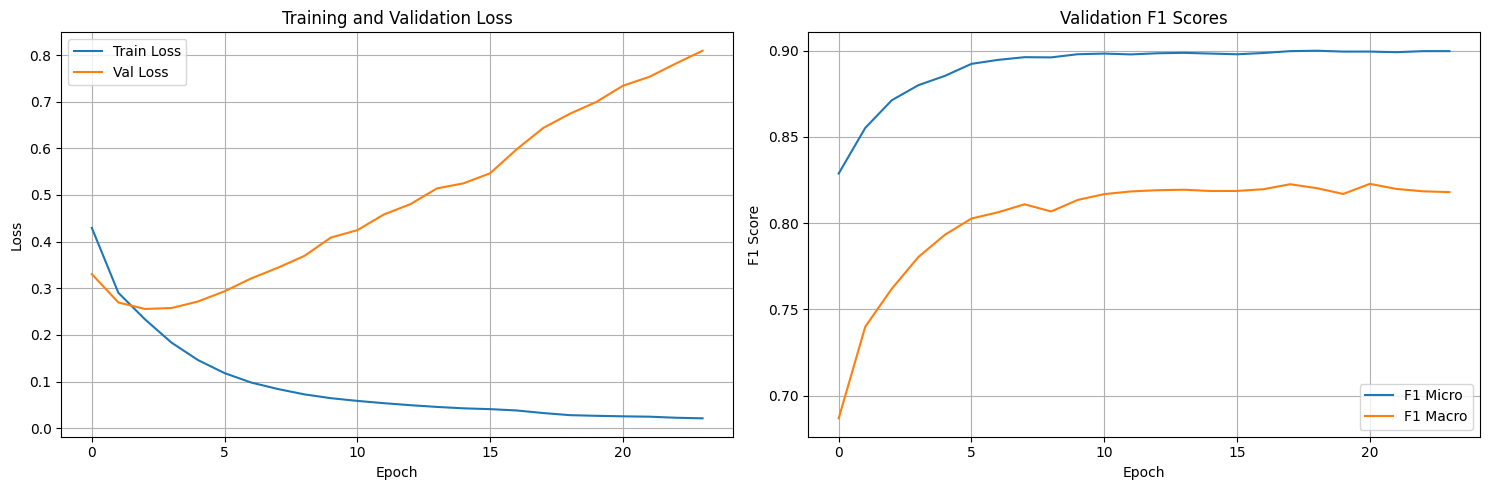

<All keys matched successfully>

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau, LambdaLR
import os

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

class EarlyStopping:
    def __init__(self, patience=5, mode='max'):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.mode = mode

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif (self.mode == 'max' and score <= self.best_score) or (self.mode == 'min' and score >= self.best_score):
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
def plot_training_metrics(metrics):
    plt.figure(figsize=(15, 5))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(metrics['f1_micro'], label='F1 Micro')
    plt.plot(metrics['f1_macro'], label='F1 Macro')
    plt.title('Validation F1 Scores')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
def plot_history(train_losses, val_f1s, metric='f1_micro'):
    fig, ax1 = plt.subplots()

    ax1.plot(train_losses, 'b-', label='Train Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='b')

    ax2 = ax1.twinx()
    ax2.plot(val_f1s, 'g-', label=f'Val {metric}')
    ax2.set_ylabel(f'{metric}', color='g')

    fig.tight_layout()
    plt.title("Training Loss & Validation Metric")
    plt.show()

os.makedirs("checkpoints", exist_ok=True)
model_path = "checkpoints/best_model_2.pt"


num_epochs = 30
warmup_epochs = 3
def warmup_lambda(epoch):
    return min(1.0, (epoch + 1) / warmup_epochs)

base_scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)
warmup_scheduler = LambdaLR(optimizer, lr_lambda=warmup_lambda)

early_stopping = EarlyStopping(patience=5, mode='max')

best_score = 0
metrics = {
    'train_loss': [],
    'val_loss': [],
    'f1_micro': [],
    'f1_macro': []
}
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    train_loss = train_epoch(model, train_loader)
    
    model.eval()
    val_losses = []
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_losses.append(val_loss.item())
            all_preds.extend((outputs.cpu().numpy() > 0.15).astype(int))
            all_labels.extend(labels.cpu().numpy())

    val_loss_mean = np.mean(val_losses)
    f1_micro = f1_score(all_labels, all_preds, average='micro')
    f1_macro = f1_score(all_labels, all_preds, average='macro')

    metrics['train_loss'].append(train_loss)
    metrics['val_loss'].append(val_loss_mean)
    metrics['f1_micro'].append(f1_micro)
    metrics['f1_macro'].append(f1_macro)
    f1_micro, f1_macro = eval_epoch(model, val_loader, threshold=0.15)

    print(f"Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

    if epoch < warmup_epochs:
        warmup_scheduler.step()
    else:
        base_scheduler.step(f1_micro)

    # Save model if improved
    if f1_micro > best_score:
        best_score = f1_micro
        torch.save(model.state_dict(), model_path)
        print("Модель сохранена!")

    early_stopping(f1_micro)
    if early_stopping.early_stop:
        print("Ранняя остановка!")
        break

plot_training_metrics(metrics)

model.load_state_dict(torch.load(model_path))


In [38]:
model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
model.load_state_dict(torch.load("checkpoints/best_model_2.pt"))
model.to(device)
model.eval()
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.2).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_115.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 110.55it/s]


In [36]:
def find_best_threshold(model, val_loader, device):
    model.eval()
    thresholds = np.linspace(0.1, 0.9, 17)
    best_f1 = 0
    best_thresh = 0.5

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch = batch['input'].to(device)
            y_batch = batch['label'].to(device)

            outputs = model(X_batch).cpu().numpy()
            all_outputs.append(outputs)
            all_targets.append(y_batch.cpu().numpy())

    all_outputs = np.vstack(all_outputs)
    all_targets = np.vstack(all_targets)

    for threshold in thresholds:
        preds = (all_outputs > threshold).astype(int)
        score = f1_score(all_targets, preds, average='macro')
        if score > best_f1:
            best_f1 = score
            best_thresh = threshold

    print(f"Best threshold: {best_thresh:.2f}, F1: {best_f1:.4f}")
    return best_thresh


In [37]:
threshold = find_best_threshold(model,val_loader, device)

Best threshold: 0.20, F1: 0.8215


Выводы: Эксперимент с добавлением сгенерированных примеров показал, что синтетические данные успешно сохраняют распределение и семантические закономерности оригинального датасета. Ключевые метрики модели (F1-macro) остались на прежнем уровне или незначительно улучшились, что подтверждает жизнеспособность подхода. Особенно ценно, что метод не привел к ожидаемому падению качества, которое часто возникает при использовании синтетики.

## Модель с лучшим скором на Kaggle

In [ ]:
# pip install -r requirements.txt

In [39]:
# import glob
# import os
# import random
# import zipfile
# from collections import Counter

# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# import numpy as np

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score, accuracy_score
# from tqdm import tqdm
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# from torch.optim.lr_scheduler import ReduceLROnPlateau, LambdaLR
# import os

In [40]:
zip_path = "dl-2025-study-competition-2.zip"
extract_dir = "data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

train_path = os.path.join(extract_dir, 'train.csv')
test_path = os.path.join(extract_dir, 'test.csv')

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

stemmer = SnowballStemmer("russian")
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|t\.me/\S+|vk\.com/\S+|#\w+', ' ', text)
    text = re.sub(r'[^\w\sа-яё0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_df['clean_text']).astype(np.float32)
X_test = vectorizer.transform(test_df['clean_text']).astype(np.float32)

y = np.array([list(map(int, x.split())) for x in train_df['labels']])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.X[idx].toarray(), dtype=torch.float).squeeze(0),
            'label': torch.tensor(self.y[idx], dtype=torch.float)
        }

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)
test_dataset = TfidfDataset(X_test, np.zeros((X_test.shape[0], y.shape[1])))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.34it/s]


Loss=0.4120, F1_micro=0.8377, F1_macro=0.6953
Модель сохранена!
Epoch 2/30


Val: 100%|██████████| 93/93 [00:00<00:00, 110.83it/s]


Loss=0.2605, F1_micro=0.8726, F1_macro=0.7668
Модель сохранена!
Epoch 3/30


Val: 100%|██████████| 93/93 [00:00<00:00, 107.72it/s]


Loss=0.2013, F1_micro=0.8882, F1_macro=0.7908
Модель сохранена!
Epoch 4/30


Val: 100%|██████████| 93/93 [00:00<00:00, 109.80it/s]


Loss=0.1548, F1_micro=0.9005, F1_macro=0.8106
Модель сохранена!
Epoch 5/30


Val: 100%|██████████| 93/93 [00:00<00:00, 110.04it/s]


Loss=0.1215, F1_micro=0.9077, F1_macro=0.8167
Модель сохранена!
Epoch 6/30


Val: 100%|██████████| 93/93 [00:00<00:00, 106.56it/s]


Loss=0.0994, F1_micro=0.9110, F1_macro=0.8150
Модель сохранена!
Epoch 7/30


Val: 100%|██████████| 93/93 [00:00<00:00, 106.92it/s]


Loss=0.0826, F1_micro=0.9142, F1_macro=0.8221
Модель сохранена!
Epoch 8/30


Val: 100%|██████████| 93/93 [00:00<00:00, 114.53it/s]


Loss=0.0711, F1_micro=0.9162, F1_macro=0.8249
Модель сохранена!
Epoch 9/30


Val: 100%|██████████| 93/93 [00:00<00:00, 112.75it/s]


Loss=0.0620, F1_micro=0.9173, F1_macro=0.8285
Модель сохранена!
Epoch 10/30


Val: 100%|██████████| 93/93 [00:00<00:00, 115.21it/s]


Loss=0.0548, F1_micro=0.9181, F1_macro=0.8295
Модель сохранена!
Epoch 11/30


Val: 100%|██████████| 93/93 [00:00<00:00, 112.43it/s]


Loss=0.0496, F1_micro=0.9184, F1_macro=0.8272
Модель сохранена!
Epoch 12/30


Val: 100%|██████████| 93/93 [00:00<00:00, 115.75it/s]


Loss=0.0452, F1_micro=0.9190, F1_macro=0.8295
Модель сохранена!
Epoch 13/30


Val: 100%|██████████| 93/93 [00:00<00:00, 115.60it/s]


Loss=0.0421, F1_micro=0.9183, F1_macro=0.8341
Epoch 14/30


Val: 100%|██████████| 93/93 [00:00<00:00, 117.98it/s]


Loss=0.0384, F1_micro=0.9183, F1_macro=0.8329
Epoch 15/30


Val: 100%|██████████| 93/93 [00:00<00:00, 110.46it/s]


Loss=0.0358, F1_micro=0.9184, F1_macro=0.8385
Epoch 00012: reducing learning rate of group 0 to 5.0000e-04.
Epoch 16/30


Val: 100%|██████████| 93/93 [00:00<00:00, 116.28it/s]


Loss=0.0294, F1_micro=0.9201, F1_macro=0.8382
Модель сохранена!
Epoch 17/30


Val: 100%|██████████| 93/93 [00:00<00:00, 114.70it/s]


Loss=0.0254, F1_micro=0.9206, F1_macro=0.8393
Модель сохранена!
Epoch 18/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.78it/s]


Loss=0.0238, F1_micro=0.9208, F1_macro=0.8393
Модель сохранена!
Epoch 19/30


Val: 100%|██████████| 93/93 [00:00<00:00, 118.89it/s]


Loss=0.0225, F1_micro=0.9210, F1_macro=0.8411
Модель сохранена!
Epoch 20/30


Val: 100%|██████████| 93/93 [00:00<00:00, 115.74it/s]


Loss=0.0220, F1_micro=0.9204, F1_macro=0.8354
Epoch 21/30


Val: 100%|██████████| 93/93 [00:00<00:00, 112.22it/s]


Loss=0.0211, F1_micro=0.9203, F1_macro=0.8357
Epoch 22/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.49it/s]


Loss=0.0202, F1_micro=0.9203, F1_macro=0.8382
Epoch 00019: reducing learning rate of group 0 to 2.5000e-04.
Epoch 23/30


Val: 100%|██████████| 93/93 [00:00<00:00, 113.43it/s]


Loss=0.0182, F1_micro=0.9208, F1_macro=0.8354
Epoch 24/30


Val: 100%|██████████| 93/93 [00:00<00:00, 111.88it/s]


Loss=0.0168, F1_micro=0.9208, F1_macro=0.8407
Ранняя остановка!


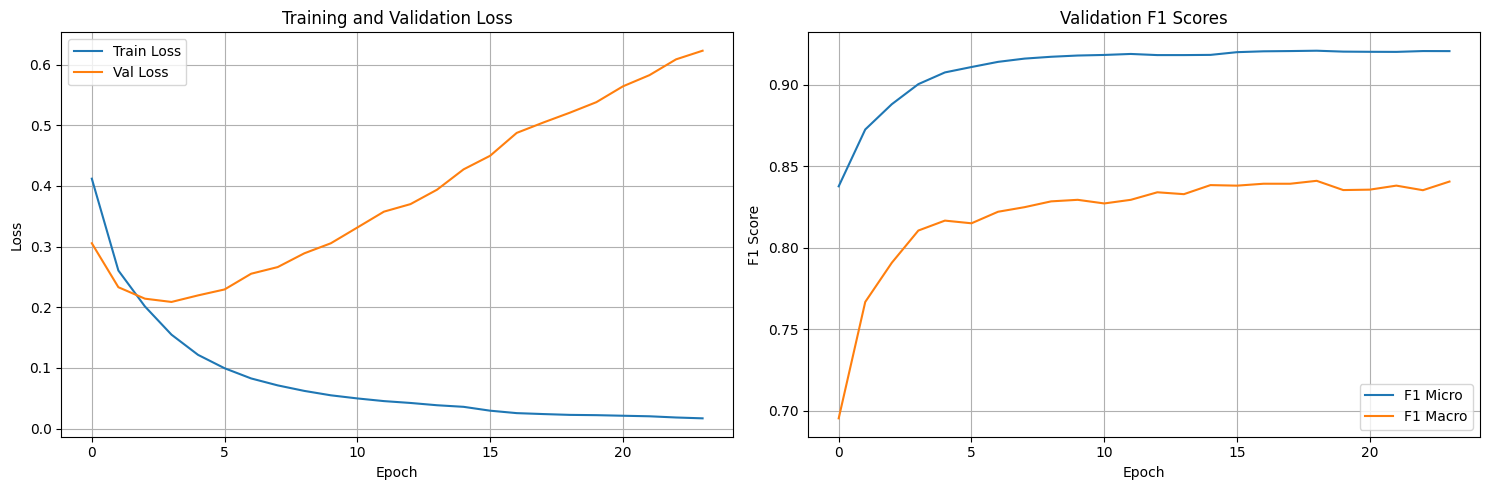

<All keys matched successfully>

In [41]:
class TfidfMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


def train_epoch(model, loader):
    model.train()
    losses = []
    for batch in tqdm(loader, desc='Train'):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(model, loader, threshold=0.15):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc='Val'):
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            preds.extend((outputs.cpu().numpy() > threshold).astype(int))
            true_labels.extend(labels.cpu().numpy())
    f1_micro = f1_score(true_labels, preds, average='micro')
    f1_macro = f1_score(true_labels, preds, average='macro')
    return f1_micro, f1_macro

class EarlyStopping:
    def __init__(self, patience=5, mode='max'):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.mode = mode

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif (self.mode == 'max' and score <= self.best_score) or (self.mode == 'min' and score >= self.best_score):
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
def plot_training_metrics(metrics):
    plt.figure(figsize=(15, 5))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(metrics['f1_micro'], label='F1 Micro')
    plt.plot(metrics['f1_macro'], label='F1 Macro')
    plt.title('Validation F1 Scores')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

os.makedirs("checkpoints", exist_ok=True)
model_path = "checkpoints/best_model_1.pt"


num_epochs = 30
warmup_epochs = 3
def warmup_lambda(epoch):
    return min(1.0, (epoch + 1) / warmup_epochs)

base_scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)
warmup_scheduler = LambdaLR(optimizer, lr_lambda=warmup_lambda)

early_stopping = EarlyStopping(patience=5, mode='max')

best_score = 0
metrics = {
    'train_loss': [],
    'val_loss': [],
    'f1_micro': [],
    'f1_macro': []
}
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    train_loss = train_epoch(model, train_loader)
    
    model.eval()
    val_losses = []
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_losses.append(val_loss.item())
            all_preds.extend((outputs.cpu().numpy() > 0.15).astype(int))
            all_labels.extend(labels.cpu().numpy())

    val_loss_mean = np.mean(val_losses)
    f1_micro = f1_score(all_labels, all_preds, average='micro')
    f1_macro = f1_score(all_labels, all_preds, average='macro')

    metrics['train_loss'].append(train_loss)
    metrics['val_loss'].append(val_loss_mean)
    metrics['f1_micro'].append(f1_micro)
    metrics['f1_macro'].append(f1_macro)
    f1_micro, f1_macro = eval_epoch(model, val_loader, threshold=0.15)

    print(f"Loss={train_loss:.4f}, F1_micro={f1_micro:.4f}, F1_macro={f1_macro:.4f}")

    if epoch < warmup_epochs:
        warmup_scheduler.step()
    else:
        base_scheduler.step(f1_micro)

    # Save model if improved
    if f1_micro > best_score:
        best_score = f1_micro
        torch.save(model.state_dict(), model_path)
        print("Модель сохранена!")

    early_stopping(f1_micro)
    if early_stopping.early_stop:
        print("Ранняя остановка!")
        break

plot_training_metrics(metrics)

model.load_state_dict(torch.load(model_path))

In [42]:
model = TfidfMLP(input_dim=X.shape[1], output_dim=y.shape[1])
model.load_state_dict(torch.load("checkpoints/best_model_1.pt"))
model.to(device)
model.eval()
model.eval()
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predict"):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        preds = (outputs.cpu().numpy() > 0.20).astype(int)
        all_preds.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in all_preds]
})

submission.to_csv('submission_tfidf_mlp_150.csv', index=False)

Predict: 100%|██████████| 116/116 [00:01<00:00, 112.26it/s]


In [43]:
threshold = find_best_threshold(model,val_loader, device)

Best threshold: 0.15, F1: 0.8411
